In [1]:
import pandas as pd
import numpy as np
from seaborn import distplot
import re
import statsmodels.formula.api as smf
import statsmodels.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from statsmodels.sandbox.tools import cross_val
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections.abc import Iterable
import scipy.stats as stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from IPython.display import display

pd.options.display.max_rows = 300
pd.options.display.max_columns = 100
county_df = pd.read_csv("/home/sbr0/Dropbox/Analysis Planning/coursera stuffs/Capstone/First-Class Restaurant Location Analysis/data sets/Counties Dataset.csv")

In [2]:
data_columns = county_df.columns.tolist()

def format_colname(colname):
    
    if "revised" in colname:
        colname = colname.replace(" (revised) ","")
    elif "previous def" in colname:
        colname = colname.replace("(previous def)","previous_def")#.replace("(","_previous(")
    
    if re.search("(\d+)",colname) is not None:
        colname=colname.replace(" (","_").replace("(","_").replace(")","").strip()
    colname=colname.replace(' ',"_").replace("__","_").replace("-","_")
    return colname.lower()

col_renaming_dict={col:format_colname(col) for col in data_columns}
col_renaming_dict

{'State': 'state',
 'Raw County Data (2015)': 'raw_county_data_2015',
 'Violent crime (2015)': 'violent_crime_2015',
 'Murder and nonnegligent manslaughter (2015)': 'murder_and_nonnegligent_manslaughter_2015',
 'Rape (revised) (2015)': 'rape_2015',
 'Rape (previous def) (2015)': 'rape_previous_def_2015',
 'Robbery (2015)': 'robbery_2015',
 'Aggravated assault (2015)': 'aggravated_assault_2015',
 'Property crime (2015)': 'property_crime_2015',
 'Burglary (2015)': 'burglary_2015',
 'Larceny-theft (2015)': 'larceny_theft_2015',
 'Motor vehicle theft (2015)': 'motor_vehicle_theft_2015',
 'Arson (2015)': 'arson_2015',
 'State/County Type (2015)': 'state/county_type_2015',
 'notice num 1 (2015)': 'notice_num_1_2015',
 'notice num 2 (2015)': 'notice_num_2_2015',
 'notice 1 (2015)': 'notice_1_2015',
 'notice 2 (2015)': 'notice_2_2015',
 'County': 'county',
 'Area': 'area',
 'Loc Abbrev_x': 'loc_abbrev_x',
 'Raw County Data (2016)': 'raw_county_data_2016',
 'Violent crime (2016)': 'violent_crim

In [3]:
county_df.rename(columns=col_renaming_dict,inplace=True)
display(county_df)

,state,raw_county_data_2015,violent_crime_2015,murder_and_nonnegligent_manslaughter_2015,rape_2015,rape_previous_def_2015,robbery_2015,aggravated_assault_2015,property_crime_2015,burglary_2015,larceny_theft_2015,motor_vehicle_theft_2015,arson_2015,state/county_type_2015,notice_num_1_2015,notice_num_2_2015,notice_1_2015,notice_2_2015,county,area,loc_abbrev_x,raw_county_data_2016,violent_crime_2016,murder_and_nonnegligent_manslaughter_2016,rape_2016,rape_previous_def_2016,robbery_2016,aggravated_assault_2016,property_crime_2016,burglary_2016,larceny_theft_2016,motor_vehicle_theft_2016,arson_2016,state/county_type_2016,notice_num_1_2016,notice_num_2_2016,notice_1_2016,notice_2_2016,loc_abbrev_y,raw_county_data_2017,violent_crime_2017,murder_and_nonnegligent_manslaughter_2017,rape_2017,robbery_2017,aggravated_assault_2017,property_crime_2017,burglary_2017,larceny_theft_2017,motor_vehicle_theft_2017,arson_2017,...,popestimate2015,popestimate2016,popestimate2017,fmr0_2015,fmr1_2015,fmr2_2015,fmr3_2015,fmr4_2015,fmr0_2016,fmr1_2016,fmr2_2016,fmr3_2016,fmr4_2016,fmr0_2017,fmr1_2017,fmr2_2017,fmr3_2017,fmr4_2017,avg_fmr_2017,avg_fmr_2016,avg_fmr_2015,avg_fmr_est,income_2015,income_2016,income_2017,employed_2007,unemployed_2007,employed_2008,unemployed_2008,employed_2009,unemployed_2009,employed_2010,unemployed_2010,employed_2011,unemployed_2011,employed_2012,unemployed_2012,employed_2013,unemployed_2013,employed_2014,unemployed_2014,employed_2015,unemployed_2015,employed_2016,unemployed_2016,employed_2017,unemployed_2017,geographical_area_(sq_mi),housing_density_(per_sq_mi),population
0,Alabama,Autauga,69.0,0.0,13.0,NaN,6.0,50.0,344.0,111.0,187.0,46.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,Autauga,"Autauga, Alabama","A, Alabama",Autauga,73.0,1.0,12.0,NaN,8.0,52.0,429.0,146.0,233.0,50.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,"A, Alabama",Autauga,55.0,2.0,5.0,5.0,43.0,384.0,131.0,206.0,47.0,NaN,...,54838.0,55278.0,55504.0,628.0,663.0,788.0,1084.0,1288.0,565.0,647.0,788.0,1029.0,1336.0,565.0,647.0,788.0,1029.0,1336.0,950.00,950.00,955.75,951.916667,38591.0,39509.0,40484.0,23577.0,806.0,23420.0,1267.0,22301.0,2402.0,23431.0,2282.0,23677.0,2159.0,23961.0,1779.0,24205.0,1605.0,24107.0,1495.0,24272.0,1330.0,24593.0,1325.0,24908.0,1001.0,604.39,37.2,54571
1,Alabama,Baldwin,115.0,0.0,9.0,NaN,33.0,73.0,648.0,225.0,390.0,33.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,Baldwin,"Baldwin, Alabama","B, Alabama",Baldwin,127.0,1.0,5.0,NaN,23.0,98.0,613.0,229.0,342.0,42.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,"B, Alabama",Baldwin,163.0,1.0,9.0,18.0,135.0,737.0,226.0,442.0,69.0,NaN,...,202863.0,207509.0,212628.0,494.0,643.0,762.0,1123.0,1318.0,719.0,754.0,873.0,1272.0,1472.0,719.0,754.0,873.0,1272.0,1472.0,1092.75,1092.75,961.50,1049.000000,41412.0,43004.0,44079.0,80099.0,2560.0,79372.0,3851.0,74403.0,8048.0,75120.0,8339.0,77418.0,7627.0,78065.0,6349.0,79626.0,5654.0,81115.0,5300.0,82843.0,4862.0,85656.0,4844.0,87915.0,3652.0,2027.31,65.5,182265
2,Alabama,Bibb,7.0,0.0,2.0,NaN,1.0,4.0,41.0,20.0,18.0,3.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,Bibb,"Bibb, Alabama","B, Alabama",Bibb,0.0,0.0,0.0,NaN,0.0,0.0,37.0,20.0,14.0,3.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,"B, Alabama",Bibb,3.0,0.0,1.0,1.0,1.0,69.0,41.0,24.0,4.0,NaN,...,22561.0,22633.0,22668.0,545.0,652.0,773.0,1015.0,1142.0,613.0,726.0,840.0,1134.0,1250.0,613.0,726.0,840.0,1134.0,1250.0,987.50,987.50,895.50,956.833333,29048.0,28989.0,30022.0,8432.0,359.0,8241.0,508.0,7581.0,1161.0,7914.0,1020.0,7996.0,937.0,8047.0,751.0,8016.0,689.0,7945.0,617.0,8005.0,567.0,8050.0,557.0,8133.0,373.0,626.17,14.4,22915
3,Alabama,Blount,204.0,5.0,16.0,NaN,5.0,178.0,832.0,247.0,503.0,82.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,Blount,"Blount, Alabama","B, Alabama",Blount,394.0,1.0,17.0,NaN,9.0,367.0,867.0,261.0,501.0,105.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,"B, Alabama",Blount,313.0,1.0,14.0,5.0,293.0,812.0,198.0,502

In [4]:
county_df.isnull().sum().sort_values(ascending=False)

notice_num_2_2016                            2772
notice_2_2016                                2772
notice_2_2017                                2771
notice_num_2_2015                            2771
notice_num_2_2017                            2771
notice_2_2015                                2771
notice_1_2015                                2739
notice_num_1_2015                            2739
notice_num_1_2016                            2736
notice_1_2016                                2736
notice_1_2017                                2727
notice_num_1_2017                            2727
rape_previous_def_2016                       2420
rape_previous_def_2015                       2347
rape_2015                                     596
rape_2016                                     501
arson_2017                                    403
violent_crime_2017                            359
rape_2017                                     357
arson_2015                                    350


In [5]:
county_df.corr()["murder_and_nonnegligent_manslaughter_2015"].loc[county_df.corr()["murder_and_nonnegligent_manslaughter_2015"] > .7].sort_values(ascending=False)

murder_and_nonnegligent_manslaughter_2015    1.000000
violent_crime_2015                           0.912613
murder_and_nonnegligent_manslaughter_2017    0.899749
motor_vehicle_theft_2015                     0.889440
aggravated_assault_2015                      0.888889
murder_and_nonnegligent_manslaughter_2016    0.880588
robbery_2015                                 0.878822
motor_vehicle_theft_2017                     0.878026
property_crime_2015                          0.877108
burglary_2015                                0.867973
violent_crime_2017                           0.857711
violent_crime_2016                           0.854230
burglary_2017                                0.847061
property_crime_2017                          0.843892
aggravated_assault_2016                      0.843785
larceny_theft_2015                           0.841856
aggravated_assault_2017                      0.841762
motor_vehicle_theft_2016                     0.838789
robbery_2017                

In [6]:
rob= county_df.columns[county_df.columns.str.contains("robb")].tolist()
ags= county_df.columns[county_df.columns.str.contains("aggravated")].tolist()
burg = county_df.columns[county_df.columns.str.contains("burglar")].tolist()
larc = county_df.columns[county_df.columns.str.contains("larc")].tolist()
mvt = county_df.columns[county_df.columns.str.contains("motor_vehicle")].tolist()
vl = county_df.columns[county_df.columns.str.contains("violent_crime")].tolist()
prc = county_df.columns[county_df.columns.str.contains("property_crime")].tolist()
msl=county_df.columns[county_df.columns.str.contains('murder_and_nonnegligent_manslaughter')].tolist()
rp = county_df.columns[county_df.columns.str.contains("rape")].tolist()
inc= county_df.columns[county_df.columns.str.contains("Income")].tolist()
pop_cols=county_df.columns[county_df.columns.str.contains("POPEST")].tolist()

crime_types = rob + ags + burg + larc + mvt + vl + prc + msl + rp
#crime_types = [crime for crime in crime_types if re.search('_x\d',crime) is None]
crime_types = np.array(crime_types)
null_crime_entries_dict = {}
for year in ['2015','2016','2017']:
    year_crimes = [crime for crime in crime_types if year in crime]
    null_crime_entries_dict[year] = (county_df.loc[county_df[year_crimes]
                                    .isnull().all(axis=1)]
                                     .index.tolist()
                                    )

print("Missing Crime Entries by Year")
print("_____________________________\n")
for year, null_indices in null_crime_entries_dict.items():
    print('       ',year,":",len(null_indices))

    
n = county_df[crime_types].isnull().all(axis=1).sum()
print("\nTotal Number of Counties With only Missing Values for Crime:",n)


Missing Crime Entries by Year
_____________________________

        2015 : 211
        2016 : 185
        2017 : 277

Total Number of Counties With only Missing Values for Crime: 0


In [7]:
from functools import reduce
nulled_crime_entries = np.array(reduce(np.append,list(null_crime_entries_dict.values())))

print("Total Missing Values In the Counties Data Set After Dropping All Rows with at")
print("Least One Year With All Missing Values For Crime")
county_df.drop(nulled_crime_entries).isnull().sum()

Total Missing Values In the Counties Data Set After Dropping All Rows with at
Least One Year With All Missing Values For Crime


state                                           0
raw_county_data_2015                            0
violent_crime_2015                              0
murder_and_nonnegligent_manslaughter_2015       0
rape_2015                                     306
rape_previous_def_2015                       1897
robbery_2015                                    0
aggravated_assault_2015                         0
property_crime_2015                             3
burglary_2015                                   1
larceny_theft_2015                              1
motor_vehicle_theft_2015                        1
arson_2015                                    107
state/county_type_2015                          0
notice_num_1_2015                            2213
notice_num_2_2015                            2242
notice_1_2015                                2213
notice_2_2015                                2242
county                                          0
area                                            0


In [8]:
county_df[crime_types].isnull().sum()

robbery_2015                                  211
robbery_2016                                  185
robbery_2017                                  277
aggravated_assault_2015                       211
aggravated_assault_2016                       186
aggravated_assault_2017                       280
burglary_2015                                 212
burglary_2016                                 195
burglary_2017                                 284
larceny_theft_2015                            212
larceny_theft_2016                            188
larceny_theft_2017                            281
motor_vehicle_theft_2015                      212
motor_vehicle_theft_2016                      187
motor_vehicle_theft_2017                      279
violent_crime_2015                            211
violent_crime_2016                            187
violent_crime_2017                            359
property_crime_2015                           214
property_crime_2016                           199


In [9]:
def possible_predictors(dataset,response,varlist,suppress_print=False):
    null_index = (county_df[county_df[response].isnull()]).index
    possible_predictors = dataset.loc[null_index, varlist].isnull().sum().sort_values()
    if not suppress_print:
        print(possible_predictors)
    return possible_predictors,null_index

In [10]:
#rb16_predictors=sorted_predictor_list[:3].index.values
#rb16_predictors=["robbery_2015","property_crime_2015","burglary_2015"]

In [11]:
# def pca_imputation_prep(dataset,variables,n_components):
#     cleaned_dataset = dataset[variables].dropna()
#     pca = PCA(n_components=n_components)
#     pca_result = pca.fit(cleaned_dataset[variables])
#     print("PCA Explained Variance:",pca_result.explained_variance_ratio_)
#     print("Total Explained Variance:",sum(result.explained_variance_ratio_))
#     pca_factors = pd.DataFrame(pca.transform(cleaned_dataset[variables]),
#                                columns=["P1","P2","P3"],index=cleaned_dataset.index)
    
#     return pca_result,pca_factors


# predictor_data = county_df[rb16_predictors]
# stdrd_county_df = (predictor_data - predictor_data.mean()) / predictor_data.std()
# result, pca_factors = pca_imputation_prep(stdrd_county_df,rb16_predictors,3)
# county_result_df=pca_factors.merge(county_df,left_index=True,right_index=True,how="outer")
# county_result_df

In [12]:
from seaborn import distplot

def model_diagnostics(res,y,ypred):
    print(res.summary())
    fig, (dist_plot,residual_plot) = plt.subplots(nrows=1,ncols=2,figsize=(15,10))

    sns.distplot(y,hist=False,norm_hist=True,color='blue',label='actual values',ax=dist_plot)
    sns.distplot(ypred,hist=False,norm_hist=True,color='red',label='predicted values',ax=dist_plot)
    dist_plot.legend(loc='upper right')
    dist_plot.set_title("Distribution Plot for the Prediction of the Response Variable")
    dist_plot.set_xlabel("X")
    dist_plot.set_ylabel("Frequencies")
    residual = y - ypred
    #residual  plot
    plt.scatter(ypred,ypred - y)
    residual_plot.set_title("Residual Plot for the Prediction of the Response Variable")
    residual_plot.set_xlabel("Predicted Value")
    residual_plot.set_ylabel("Residuals")
    print("rMSE:",np.sqrt(((ypred - y)**2).sum()/len(ypred)))
    
    fig, ax = plt.subplots(figsize=(6,2.5))
    ax.set_title("QQ Plot for the Evaluation of Normality")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Sample Quantiles")
    _, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)
    print("R^2 for the QQ Plot")
    

In [13]:
def poisson_model(response=None,predictors=None,data=None,formula=None,dropna=True,return_data=False):
    assert data is not None, "No dataset was received as input"
    assert formula or (response is not None and predictors is not None),"No formula nor variables were received as input"
    if response and predictors:
        if isinstance(predictors,str):
            predictors = [predictors]
        elif isinstance(predictors,(np.ndarray,pd.Series)):
            predictors = predictors.tolist()
        elif isinstance(predictors,list):
            pass

        current_data = data[predictors + [response]].dropna().copy() if dropna else data[predictors + [response]].copy()
    else:
        current_data = data.copy()
#        current_data = dmatrices(formula,data,return_type='dataframe')
        #current_data=current_data.loc[~(current_data == np.inf).any(axis=1)]
        
    #y = current_data[response]
    #x = current_data[predictors]

    current_formula = "{resp} ~ {pred}".format(resp=response, pred="+".join(predictors)) if not formula else formula        
    model_result = sms.GeneralizedPoisson.from_formula(current_formula,data=current_data).fit(maxiter=1000)
    
    return model_result if not return_data else (model_result,current_data)

def add_transformations(variable_transformation_dict,data,omit_orig=True):
    current_data = data.copy()
    relevant_variables = list(variable_transformation_dict.keys())
    for variable,transformations in variable_transformation_dict.items():
        for idx,func in enumerate(transformations):
            var_id = str(variable) + "_x{n}".format(n = idx+2)
            relevant_variables.append(var_id)
            current_data[var_id] = func(current_data[variable])
    return current_data,[variable for variable in relevant_variables
                         if variable not in variable_transformation_dict.keys() 
                         or omit_orig == False]

def prepare_poisson(data,predictors,response,variable_transformation_dict):
    model_df,model_predictors = add_transformations(variable_transformation_dict,data)
    res,cleaned_model_df = poisson_model(response,model_predictors,model_df,return_data=True)
    ypred=res.predict(cleaned_model_df)
    model_diagnostics(res,cleaned_model_df[response],ypred)
    return res, model_df, model_predictors

# def prepare_imputation(data,predictors,response,variable_transformation_dict):
#     model_df,model_predictors = add_transformations(variable_transformation_dict,data)
#     res,cleaned_model_df = poisson_model(response,model_predictors,model_df,return_data=True)
#     response_data = data[response].copy()
#     model_df
#     imputer = IterativeImputer(BayesianRidge())
#     county_df_imputed_crime = pd.DataFrame(imputer.fit_transform(model_df[model_predictors]+[response]))
#     county_df_imputed_crime


    ypred=res.predict(cleaned_model_df)
    model_diagnostics(res,cleaned_model_df[response],ypred)
    return res, model_df, model_predictors

def poisson_predictions(model,model_df,df_to_modify,model_predictors,response):
    modification_df = df_to_modify.copy()
    var_msk = (model_df[response].isnull()) & (~model_df[model_predictors].isnull().any(axis=1))
    predictions = model.predict(model_df.loc[var_msk,model_predictors]).round()

    modification_df.loc[predictions.index,response] = predictions
    return modification_df




In [14]:
response="robbery_2016"
sorted_predictor_list,rb_null=possible_predictors(county_df,response,crime_types)

robbery_2015                                  48
murder_and_nonnegligent_manslaughter_2015     48
aggravated_assault_2015                       48
property_crime_2015                           48
violent_crime_2015                            48
burglary_2015                                 48
motor_vehicle_theft_2015                      48
larceny_theft_2015                            48
murder_and_nonnegligent_manslaughter_2017     57
larceny_theft_2017                            57
motor_vehicle_theft_2017                      57
robbery_2017                                  57
aggravated_assault_2017                       57
burglary_2017                                 58
property_crime_2017                           58
violent_crime_2017                            66
rape_2017                                     66
rape_2015                                     86
rape_previous_def_2015                       147
rape_previous_def_2016                       185
aggravated_assault_2

Optimization terminated successfully.
         Current function value: 1.918671
         Iterations: 84
         Function evaluations: 94
         Gradient evaluations: 94
                    GeneralizedPoisson Regression Results                     
Dep. Variable:           robbery_2016   No. Observations:                 2422
Model:             GeneralizedPoisson   Df Residuals:                     2415
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.2062
Time:                        19:18:03   Log-Likelihood:                -4647.0
converged:                       True   LL-Null:                       -5854.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept       

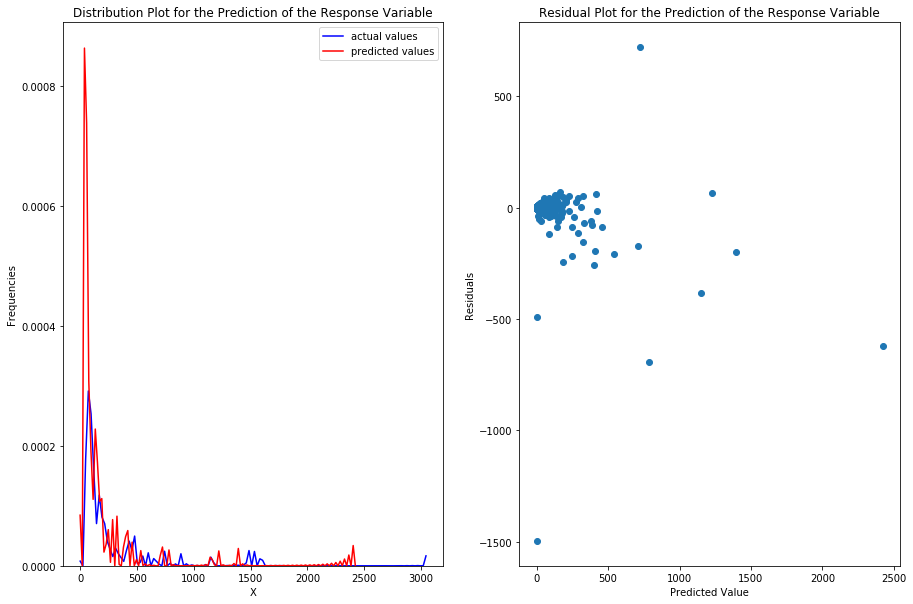

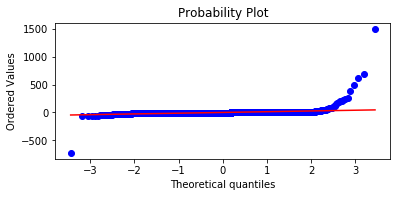

In [15]:
predictors = ["larceny_theft_2015","burglary_2015","robbery_2015"]
response="robbery_2016"
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                model_predictors=model_predictors,
                                response = response)

In [16]:
print("Remaining Crime Values:\n")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'murder_and_nonnegligent_manslaughter_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:

robbery_2016                                   48
murder_and_nonnegligent_manslaughter_2016     185
aggravated_assault_2016                       186
motor_vehicle_theft_2016                      187
violent_crime_2016                            187
larceny_theft_2016                            188
burglary_2016                                 195
property_crime_2016                           199
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
robbery_2015                                  211
aggravated_assault_2015                       211
burglary_2015                                 212
motor_vehicle_theft_2015                      212
larceny_theft_2015                            212
property_crime_2015                           214
murder_and_nonnegligent_manslaughter_2017     277
robbery_2017                                  277
motor_vehicle_theft_2017                      279
aggravated_assault_2017  

Optimization terminated successfully.
         Current function value: 1.027799
         Iterations: 32
         Function evaluations: 49
         Gradient evaluations: 49


/home/sbr0/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1396: RuntimeWarning: invalid value encountered in log
  np.log(a1) - gammaln(endog + 1) - a2 / a1)


                                GeneralizedPoisson Regression Results                                
Dep. Variable:     murder_and_nonnegligent_manslaughter_2016   No. Observations:                 2423
Model:                                    GeneralizedPoisson   Df Residuals:                     2418
Method:                                                  MLE   Df Model:                            4
Date:                                       Fri, 29 May 2020   Pseudo R-squ.:                  0.2137
Time:                                               19:18:03   Log-Likelihood:                -2490.4
converged:                                              True   LL-Null:                       -3167.1
Covariance Type:                                   nonrobust   LLR p-value:                8.036e-292
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

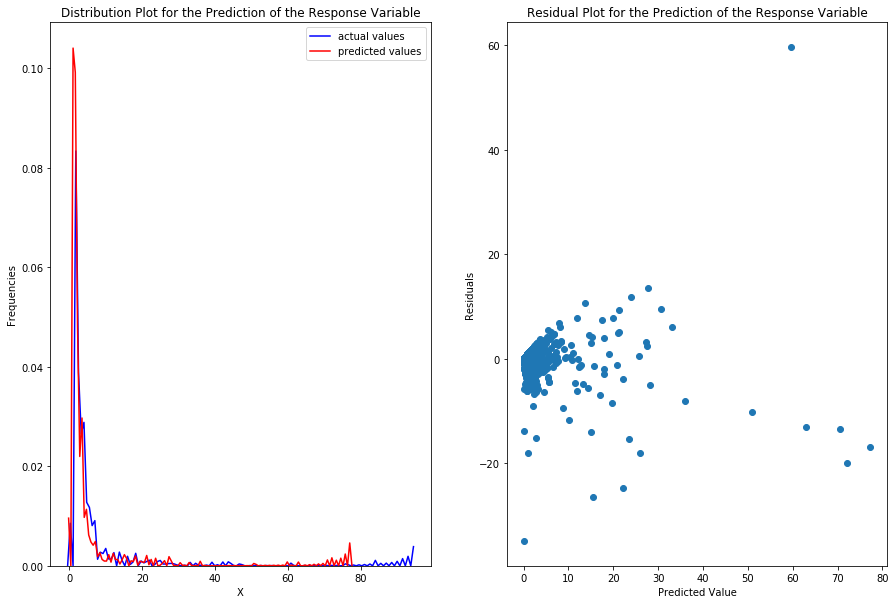

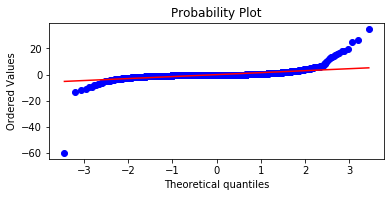

In [17]:
predictors = ["murder_and_nonnegligent_manslaughter_2015","motor_vehicle_theft_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                model_predictors=model_predictors,
                                response = response)

In [18]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'aggravated_assault_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
murder_and_nonnegligent_manslaughter_2016      48
robbery_2016                                   48
aggravated_assault_2016                       186
motor_vehicle_theft_2016                      187
violent_crime_2016                            187
larceny_theft_2016                            188
burglary_2016                                 195
property_crime_2016                           199
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
robbery_2015                                  211
aggravated_assault_2015                       211
burglary_2015                                 212
motor_vehicle_theft_2015                      212
larceny_theft_2015                            212
property_crime_2015                           214
murder_and_nonnegligent_manslaughter_2017     277
robbery_2017                                  277
motor_vehicle_theft_2017                      279
aggravated_assault_2017   

Optimization terminated successfully.
         Current function value: 4.000711
         Iterations: 36
         Function evaluations: 39
         Gradient evaluations: 39
                       GeneralizedPoisson Regression Results                       
Dep. Variable:     aggravated_assault_2016   No. Observations:                 2420
Model:                  GeneralizedPoisson   Df Residuals:                     2413
Method:                                MLE   Df Model:                            6
Date:                     Fri, 29 May 2020   Pseudo R-squ.:                  0.1317
Time:                             19:18:04   Log-Likelihood:                -9681.7
converged:                            True   LL-Null:                       -11150.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

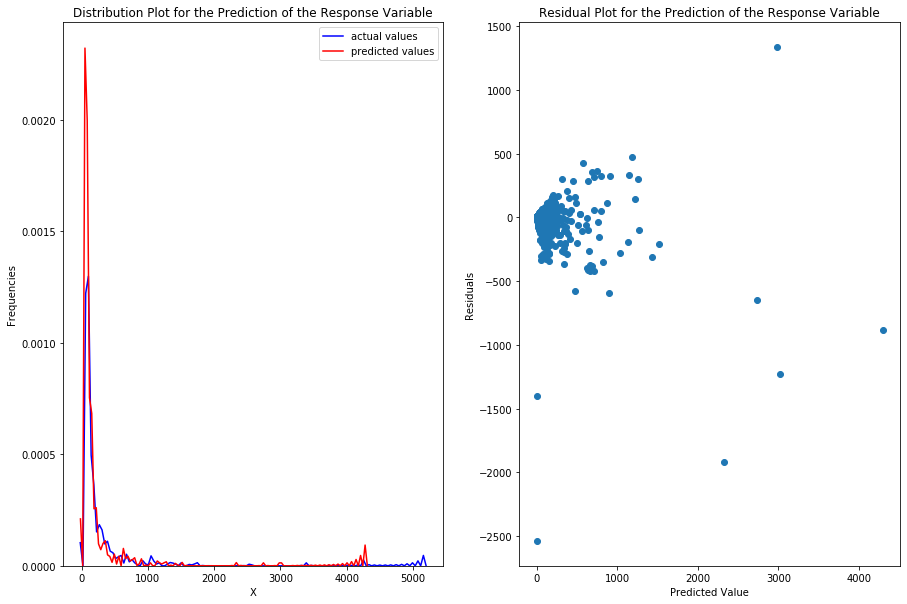

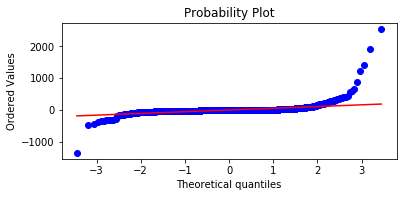

In [19]:
predictors = ["murder_and_nonnegligent_manslaughter_2016",'burglary_2015',"property_crime_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                model_predictors=model_predictors,
                                response = response)

In [20]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'motor_vehicle_theft_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
murder_and_nonnegligent_manslaughter_2016      48
robbery_2016                                   48
aggravated_assault_2016                        48
motor_vehicle_theft_2016                      187
violent_crime_2016                            187
larceny_theft_2016                            188
burglary_2016                                 195
property_crime_2016                           199
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
robbery_2015                                  211
aggravated_assault_2015                       211
burglary_2015                                 212
motor_vehicle_theft_2015                      212
larceny_theft_2015                            212
property_crime_2015                           214
murder_and_nonnegligent_manslaughter_2017     277
robbery_2017                                  277
motor_vehicle_theft_2017                      279
aggravated_assault_2017   

Optimization terminated successfully.
         Current function value: 3.767725
         Iterations: 34
         Function evaluations: 37
         Gradient evaluations: 37
                       GeneralizedPoisson Regression Results                        
Dep. Variable:     motor_vehicle_theft_2016   No. Observations:                 2585
Model:                   GeneralizedPoisson   Df Residuals:                     2578
Method:                                 MLE   Df Model:                            6
Date:                      Fri, 29 May 2020   Pseudo R-squ.:                  0.1114
Time:                              19:18:05   Log-Likelihood:                -9739.6
converged:                             True   LL-Null:                       -10960.
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

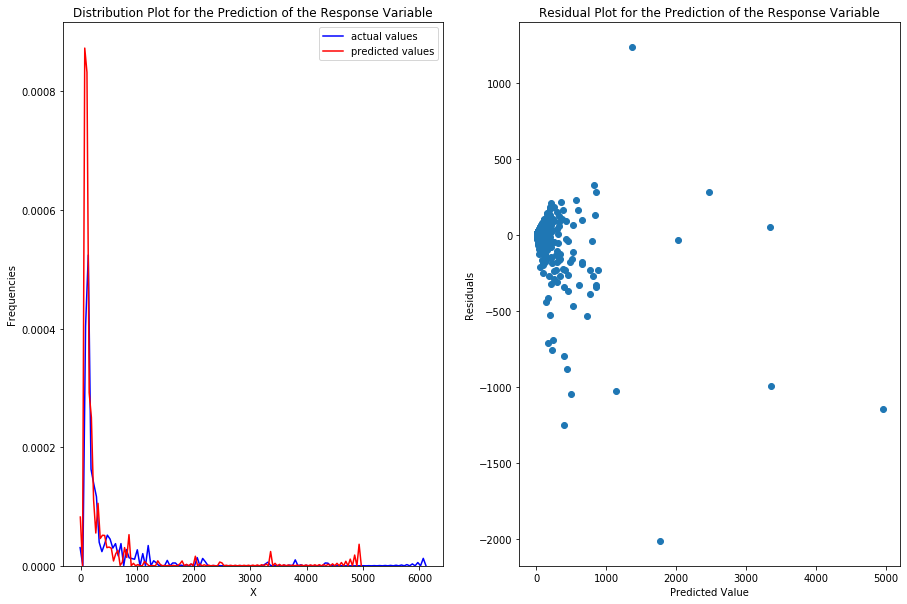

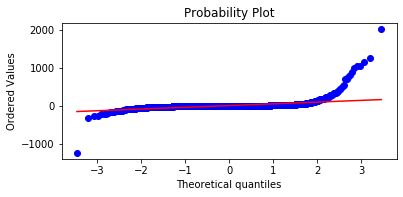

In [21]:
predictors = ["robbery_2016",'aggravated_assault_2016',"murder_and_nonnegligent_manslaughter_2016"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                model_predictors=model_predictors,
                                response = response)

In [22]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'motor_vehicle_theft_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
murder_and_nonnegligent_manslaughter_2016      48
robbery_2016                                   48
aggravated_assault_2016                        48
motor_vehicle_theft_2016                       48
violent_crime_2016                            187
larceny_theft_2016                            188
burglary_2016                                 195
property_crime_2016                           199
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
robbery_2015                                  211
aggravated_assault_2015                       211
burglary_2015                                 212
motor_vehicle_theft_2015                      212
larceny_theft_2015                            212
property_crime_2015                           214
murder_and_nonnegligent_manslaughter_2017     277
robbery_2017                                  277
motor_vehicle_theft_2017                      279
aggravated_assault_2017   

Optimization terminated successfully.
         Current function value: 3.431421
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26
                       GeneralizedPoisson Regression Results                        
Dep. Variable:     motor_vehicle_theft_2016   No. Observations:                 2445
Model:                   GeneralizedPoisson   Df Residuals:                     2438
Method:                                 MLE   Df Model:                            6
Date:                      Fri, 29 May 2020   Pseudo R-squ.:                  0.2079
Time:                              19:18:06   Log-Likelihood:                -8389.8
converged:                             True   LL-Null:                       -10592.
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

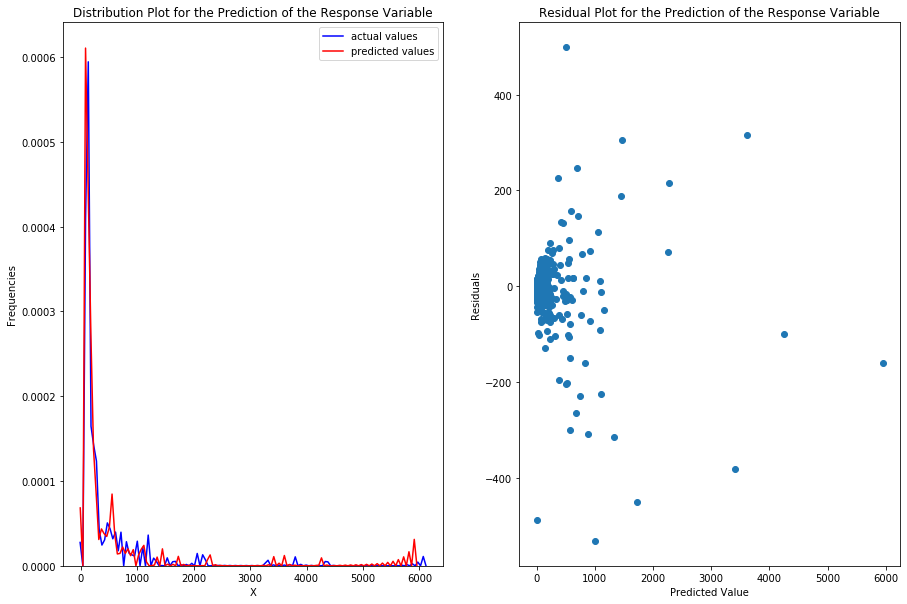

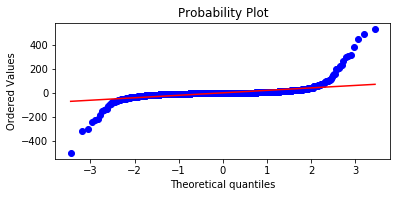

In [23]:
predictors = ["robbery_2016",'motor_vehicle_theft_2017',"murder_and_nonnegligent_manslaughter_2016"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                model_predictors=model_predictors,
                                response = response)

In [24]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'violent_crime_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
murder_and_nonnegligent_manslaughter_2016      48
robbery_2016                                   48
aggravated_assault_2016                        48
motor_vehicle_theft_2016                       48
violent_crime_2016                            187
larceny_theft_2016                            188
burglary_2016                                 195
property_crime_2016                           199
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
robbery_2015                                  211
aggravated_assault_2015                       211
burglary_2015                                 212
motor_vehicle_theft_2015                      212
larceny_theft_2015                            212
property_crime_2015                           214
murder_and_nonnegligent_manslaughter_2017     277
robbery_2017                                  277
motor_vehicle_theft_2017                      279
aggravated_assault_2017   

Optimization terminated successfully.
         Current function value: 3.043792
         Iterations: 20
         Function evaluations: 25
         Gradient evaluations: 25
                    GeneralizedPoisson Regression Results                     
Dep. Variable:     violent_crime_2016   No. Observations:                 2585
Model:             GeneralizedPoisson   Df Residuals:                     2578
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.3795
Time:                        19:18:07   Log-Likelihood:                -7868.2
converged:                       True   LL-Null:                       -12680.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

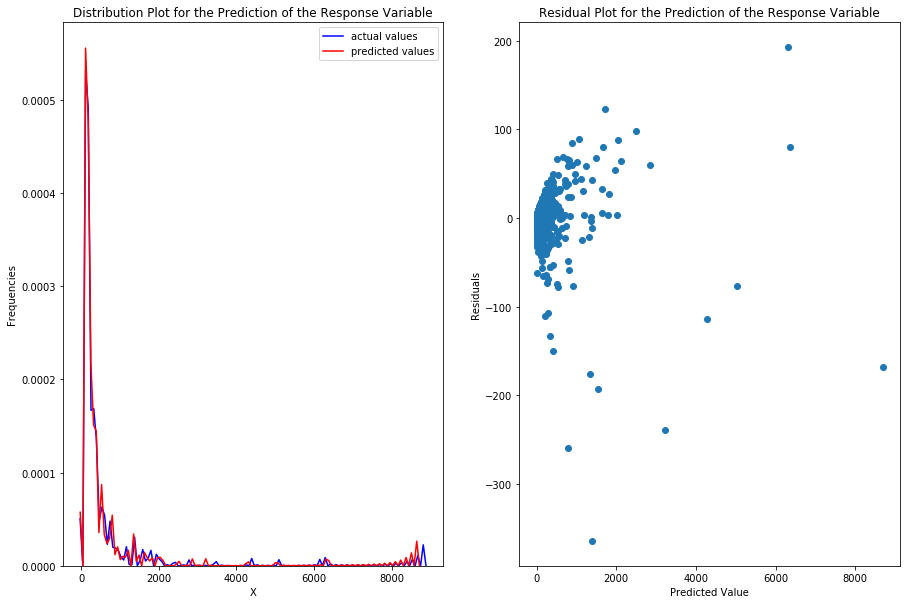

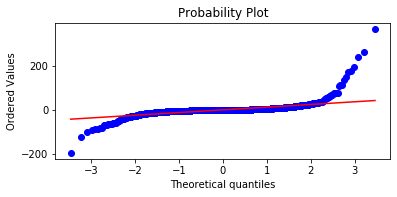

In [25]:
predictors = ["robbery_2016",'aggravated_assault_2016',"murder_and_nonnegligent_manslaughter_2016"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                model_predictors=model_predictors,
                                response = response)

In [26]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'larceny_theft_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
murder_and_nonnegligent_manslaughter_2016      48
robbery_2016                                   48
aggravated_assault_2016                        48
motor_vehicle_theft_2016                       48
violent_crime_2016                             48
larceny_theft_2016                            188
burglary_2016                                 195
property_crime_2016                           199
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
robbery_2015                                  211
aggravated_assault_2015                       211
burglary_2015                                 212
motor_vehicle_theft_2015                      212
larceny_theft_2015                            212
property_crime_2015                           214
murder_and_nonnegligent_manslaughter_2017     277
robbery_2017                                  277
motor_vehicle_theft_2017                      279
aggravated_assault_2017   

Optimization terminated successfully.
         Current function value: 5.302711
         Iterations: 26
         Function evaluations: 30
         Gradient evaluations: 30
                    GeneralizedPoisson Regression Results                     
Dep. Variable:     larceny_theft_2016   No. Observations:                 2418
Model:             GeneralizedPoisson   Df Residuals:                     2411
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1735
Time:                        19:18:08   Log-Likelihood:                -12822.
converged:                       True   LL-Null:                       -15514.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Interc

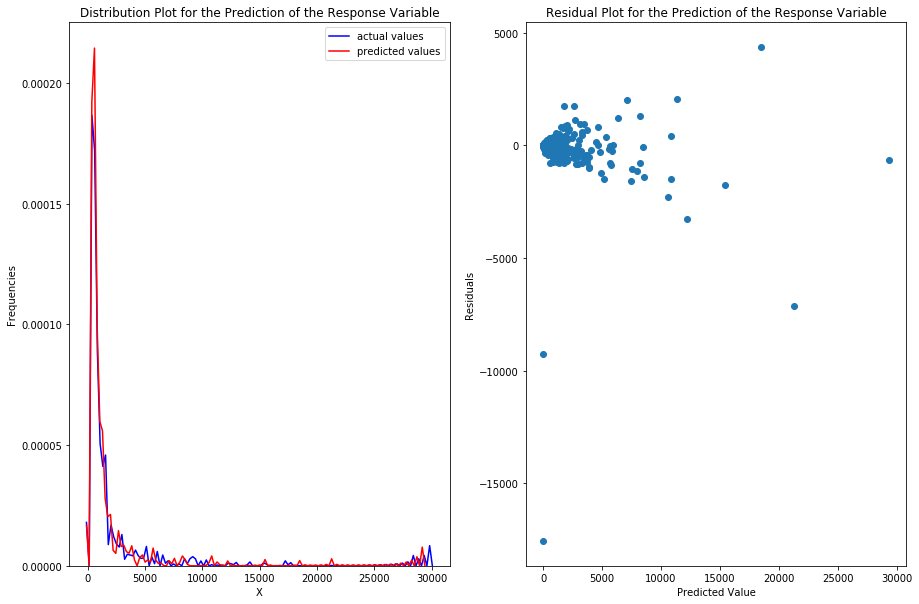

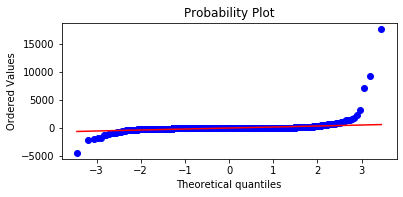

In [27]:
predictors = ["robbery_2016",'property_crime_2015',"aggravated_assault_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                model_predictors=model_predictors,
                                response = response)

In [28]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'burglary_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
murder_and_nonnegligent_manslaughter_2016      48
robbery_2016                                   48
aggravated_assault_2016                        48
motor_vehicle_theft_2016                       48
violent_crime_2016                             48
larceny_theft_2016                             48
burglary_2016                                 195
property_crime_2016                           199
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
robbery_2015                                  211
aggravated_assault_2015                       211
burglary_2015                                 212
motor_vehicle_theft_2015                      212
larceny_theft_2015                            212
property_crime_2015                           214
murder_and_nonnegligent_manslaughter_2017     277
robbery_2017                                  277
motor_vehicle_theft_2017                      279
aggravated_assault_2017   

Optimization terminated successfully.
         Current function value: 4.607952
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29
                    GeneralizedPoisson Regression Results                     
Dep. Variable:          burglary_2016   No. Observations:                 2414
Model:             GeneralizedPoisson   Df Residuals:                     2407
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1833
Time:                        19:18:09   Log-Likelihood:                -11124.
converged:                       True   LL-Null:                       -13620.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Inte

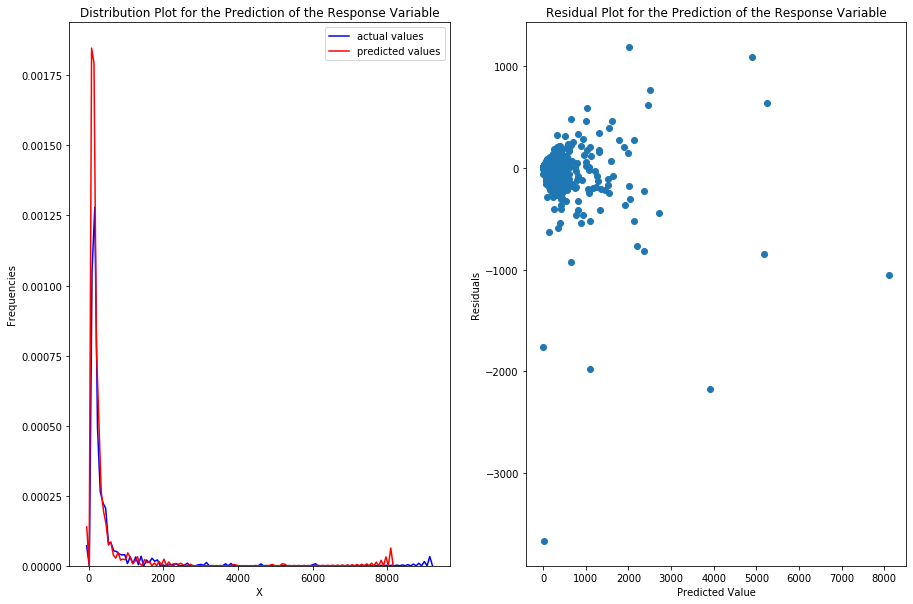

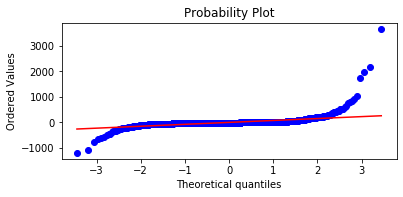

In [29]:
predictors = ['property_crime_2015',"motor_vehicle_theft_2016","robbery_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                model_predictors=model_predictors,
                                response = response)

In [30]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'burglary_2017'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
murder_and_nonnegligent_manslaughter_2016      48
robbery_2016                                   48
aggravated_assault_2016                        48
motor_vehicle_theft_2016                       48
violent_crime_2016                             48
larceny_theft_2016                             48
burglary_2016                                  51
property_crime_2016                           199
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
robbery_2015                                  211
aggravated_assault_2015                       211
burglary_2015                                 212
motor_vehicle_theft_2015                      212
larceny_theft_2015                            212
property_crime_2015                           214
murder_and_nonnegligent_manslaughter_2017     277
robbery_2017                                  277
motor_vehicle_theft_2017                      279
aggravated_assault_2017   

Optimization terminated successfully.
         Current function value: 4.697117
         Iterations: 29
         Function evaluations: 32
         Gradient evaluations: 32
                    GeneralizedPoisson Regression Results                     
Dep. Variable:          burglary_2017   No. Observations:                 2440
Model:             GeneralizedPoisson   Df Residuals:                     2433
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1586
Time:                        19:18:09   Log-Likelihood:                -11461.
converged:                       True   LL-Null:                       -13621.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Inte

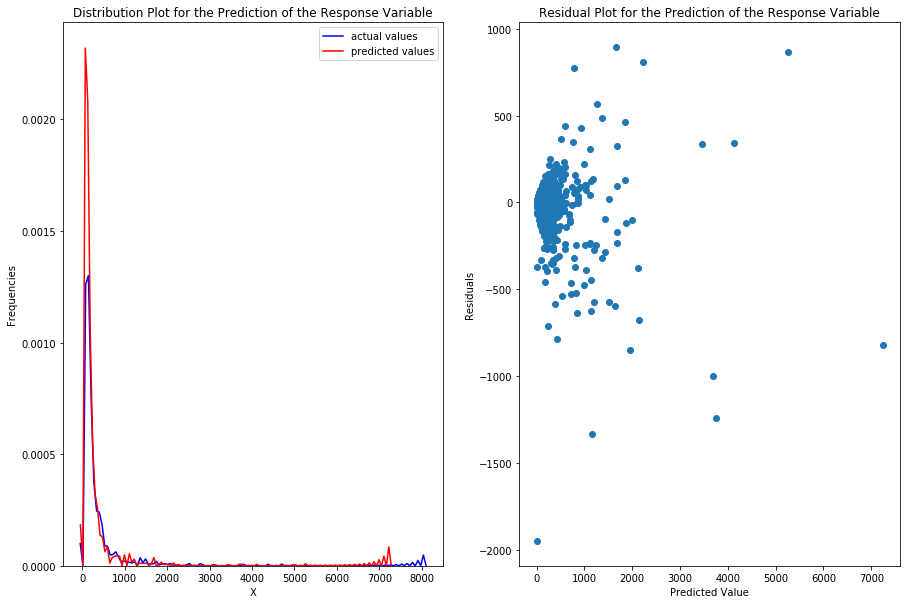

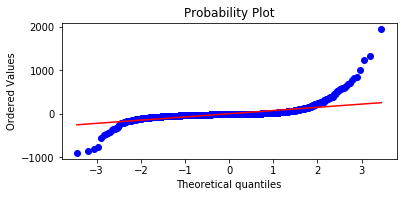

In [31]:
predictors = ['larceny_theft_2016',"motor_vehicle_theft_2016","aggravated_assault_2016"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [32]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'property_crime_2017'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
burglary_2017                                   0
robbery_2016                                   48
violent_crime_2016                             48
aggravated_assault_2016                        48
larceny_theft_2016                             48
murder_and_nonnegligent_manslaughter_2016      48
motor_vehicle_theft_2016                       48
burglary_2016                                  51
property_crime_2016                           199
robbery_2015                                  211
aggravated_assault_2015                       211
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
larceny_theft_2015                            212
burglary_2015                                 212
motor_vehicle_theft_2015                      212
property_crime_2015                           214
murder_and_nonnegligent_manslaughter_2017     277
robbery_2017                                  277
motor_vehicle_theft_2017  

Optimization terminated successfully.
         Current function value: 5.174759
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
                     GeneralizedPoisson Regression Results                     
Dep. Variable:     property_crime_2017   No. Observations:                 2438
Model:              GeneralizedPoisson   Df Residuals:                     2429
Method:                            MLE   Df Model:                            8
Date:                 Fri, 29 May 2020   Pseudo R-squ.:                  0.2531
Time:                         19:18:10   Log-Likelihood:                -12616.
converged:                        True   LL-Null:                       -16892.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

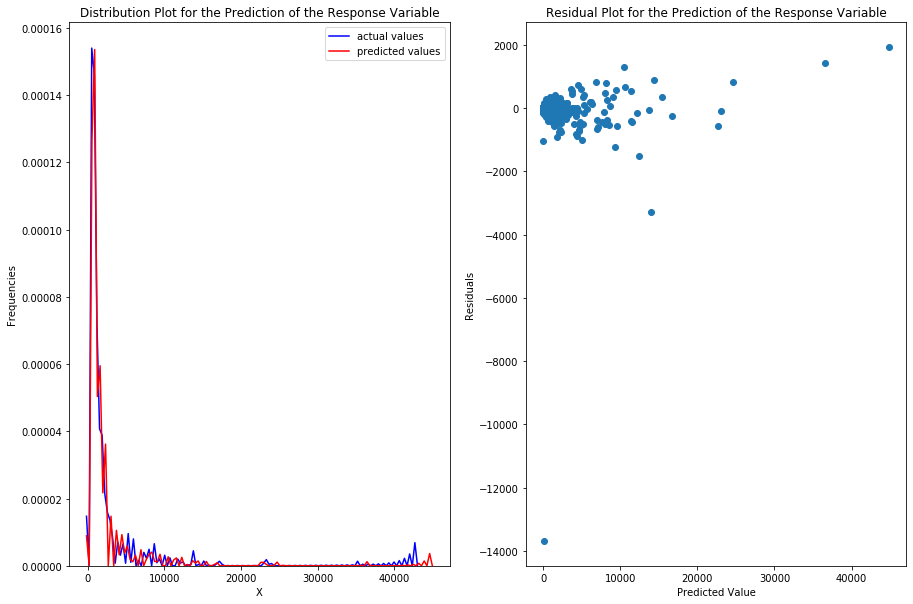

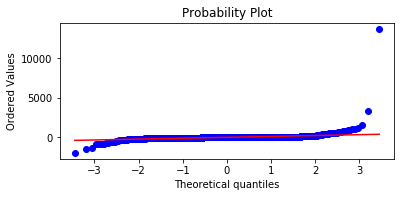

In [33]:
predictors = ['larceny_theft_2016',"violent_crime_2016","aggravated_assault_2016","burglary_2017"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [34]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'larceny_theft_2017'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
property_crime_2017                             0
burglary_2017                                   0
robbery_2016                                   48
violent_crime_2016                             48
aggravated_assault_2016                        48
motor_vehicle_theft_2016                       48
larceny_theft_2016                             48
murder_and_nonnegligent_manslaughter_2016      48
burglary_2016                                  51
property_crime_2016                           199
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
robbery_2015                                  211
aggravated_assault_2015                       211
burglary_2015                                 212
motor_vehicle_theft_2015                      212
larceny_theft_2015                            212
property_crime_2015                           214
murder_and_nonnegligent_manslaughter_2017     277
robbery_2017              

Optimization terminated successfully.
         Current function value: 4.087068
         Iterations: 28
         Function evaluations: 39
         Gradient evaluations: 39
                    GeneralizedPoisson Regression Results                     
Dep. Variable:     larceny_theft_2017   No. Observations:                 2443
Model:             GeneralizedPoisson   Df Residuals:                     2434
Method:                           MLE   Df Model:                            8
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.3635
Time:                        19:18:11   Log-Likelihood:                -9984.7
converged:                       True   LL-Null:                       -15687.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

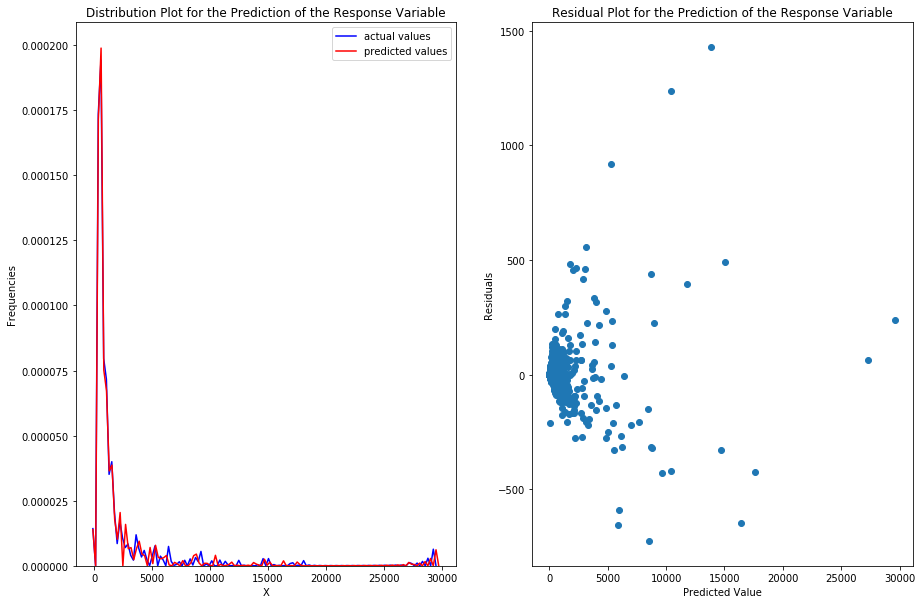

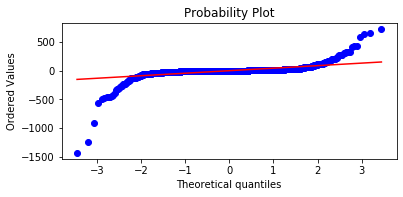

In [35]:
predictors = ['property_crime_2017',"larceny_theft_2016","murder_and_nonnegligent_manslaughter_2016","burglary_2017"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [36]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'violent_crime_2017'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
property_crime_2017                             0
larceny_theft_2017                              0
burglary_2017                                   0
violent_crime_2016                             48
murder_and_nonnegligent_manslaughter_2016      48
motor_vehicle_theft_2016                       48
larceny_theft_2016                             48
aggravated_assault_2016                        48
robbery_2016                                   48
burglary_2016                                  51
property_crime_2016                           199
aggravated_assault_2015                       211
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
robbery_2015                                  211
larceny_theft_2015                            212
motor_vehicle_theft_2015                      212
burglary_2015                                 212
property_crime_2015                           214
murder_and_nonnegligent_ma

Optimization terminated successfully.
         Current function value: 4.149570
         Iterations: 39
         Function evaluations: 42
         Gradient evaluations: 42
                    GeneralizedPoisson Regression Results                     
Dep. Variable:     violent_crime_2017   No. Observations:                 2413
Model:             GeneralizedPoisson   Df Residuals:                     2406
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1588
Time:                        19:18:12   Log-Likelihood:                -10013.
converged:                       True   LL-Null:                       -11902.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept     

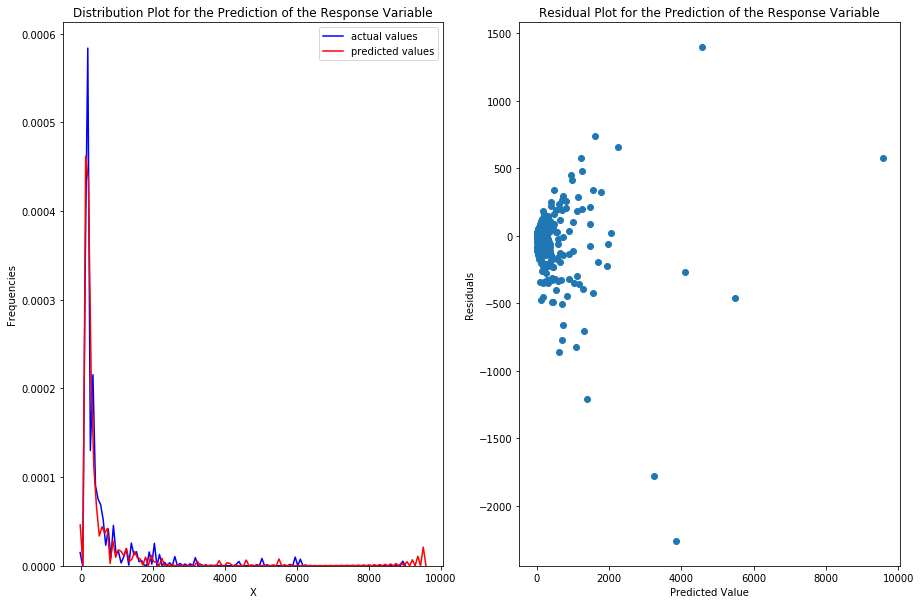

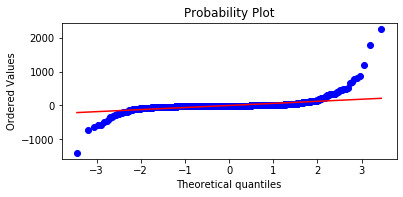

In [37]:
predictors = ['property_crime_2017',"larceny_theft_2017","burglary_2017"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [38]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'robbery_2017'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
violent_crime_2017                              0
burglary_2017                                   0
property_crime_2017                             0
larceny_theft_2017                              0
larceny_theft_2016                             48
robbery_2016                                   48
aggravated_assault_2016                        48
violent_crime_2016                             48
murder_and_nonnegligent_manslaughter_2016      48
motor_vehicle_theft_2016                       48
burglary_2016                                  51
property_crime_2016                           199
violent_crime_2015                            211
robbery_2015                                  211
aggravated_assault_2015                       211
murder_and_nonnegligent_manslaughter_2015     211
larceny_theft_2015                            212
burglary_2015                                 212
motor_vehicle_theft_2015                      212
property_crime_2015       

Optimization terminated successfully.
         Current function value: 1.889499
         Iterations: 33
         Function evaluations: 37
         Gradient evaluations: 37
                    GeneralizedPoisson Regression Results                     
Dep. Variable:           robbery_2017   No. Observations:                 2447
Model:             GeneralizedPoisson   Df Residuals:                     2442
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.2184
Time:                        19:18:13   Log-Likelihood:                -4623.6
converged:                       True   LL-Null:                       -5915.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Interc

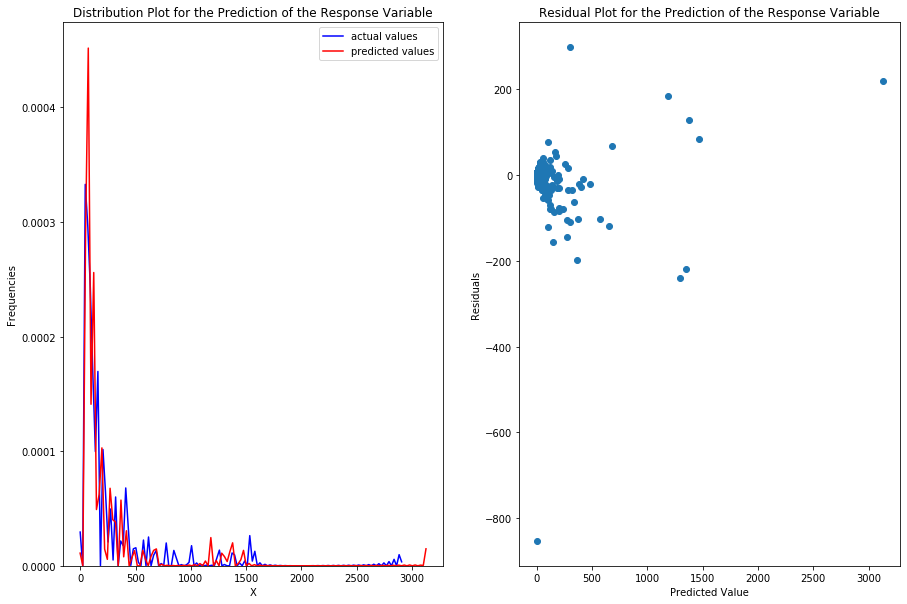

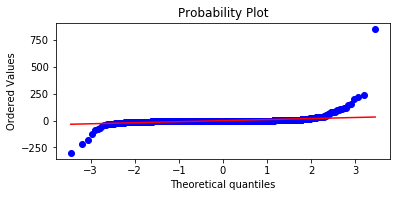

In [39]:
predictors = ['violent_crime_2016',"aggravated_assault_2016"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [40]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'murder_and_nonnegligent_manslaughter_2017'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2017                                    0
violent_crime_2017                              0
burglary_2017                                   0
property_crime_2017                             0
larceny_theft_2017                              0
larceny_theft_2016                             48
robbery_2016                                   48
aggravated_assault_2016                        48
violent_crime_2016                             48
murder_and_nonnegligent_manslaughter_2016      48
motor_vehicle_theft_2016                       48
burglary_2016                                  51
property_crime_2016                           199
violent_crime_2015                            211
robbery_2015                                  211
aggravated_assault_2015                       211
murder_and_nonnegligent_manslaughter_2015     211
larceny_theft_2015                            212
burglary_2015                                 212
motor_vehicle_theft_2015  

         Current function value: nan
         Iterations: 1
         Function evaluations: 24
         Gradient evaluations: 24
                                GeneralizedPoisson Regression Results                                
Dep. Variable:     murder_and_nonnegligent_manslaughter_2017   No. Observations:                 2495
Model:                                    GeneralizedPoisson   Df Residuals:                     2492
Method:                                                  MLE   Df Model:                            2
Date:                                       Fri, 29 May 2020   Pseudo R-squ.:                     nan
Time:                                               19:18:14   Log-Likelihood:                    nan
converged:                                             False   LL-Null:                       -3228.6
Covariance Type:                                   nonrobust   LLR p-value:                       nan
                       coef    std err          z      P

/home/sbr0/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1396: RuntimeWarning: invalid value encountered in log
  np.log(a1) - gammaln(endog + 1) - a2 / a1)
/home/sbr0/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1396: RuntimeWarning: invalid value encountered in log
  np.log(a1) - gammaln(endog + 1) - a2 / a1)
/home/sbr0/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sbr0/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1396: RuntimeWarning: invalid value encountered in log
  np.log(a1) - gammaln(endog + 1) - a2 / a1)


rMSE: 3.818487748523418
R^2 for the QQ Plot


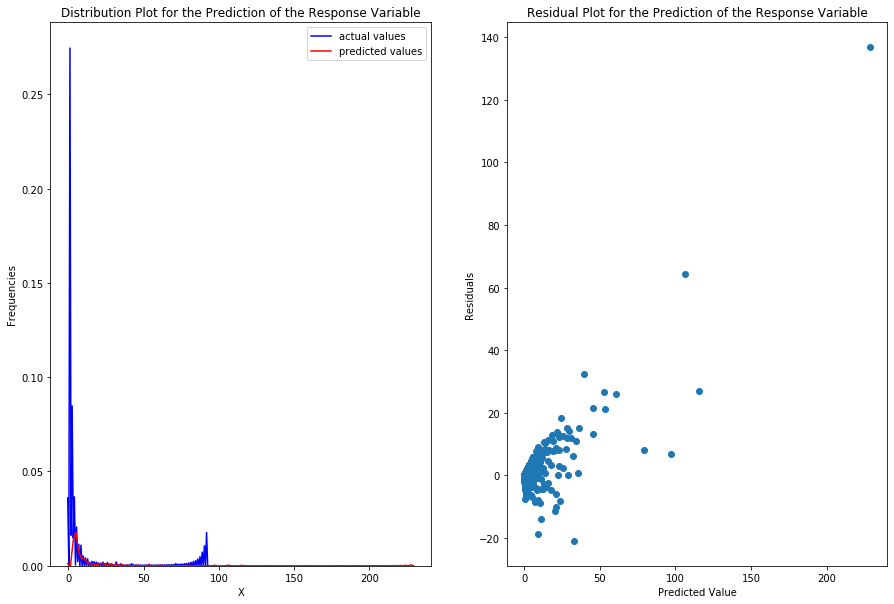

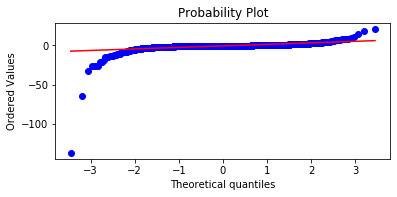

In [41]:
predictors = ['burglary_2017']
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [42]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'property_crime_2015'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2017                                    0
murder_and_nonnegligent_manslaughter_2017       0
violent_crime_2017                              0
burglary_2017                                   0
property_crime_2017                             0
larceny_theft_2017                              0
larceny_theft_2016                             48
robbery_2016                                   48
aggravated_assault_2016                        48
violent_crime_2016                             48
motor_vehicle_theft_2016                       48
murder_and_nonnegligent_manslaughter_2016      48
burglary_2016                                  51
property_crime_2016                           199
violent_crime_2015                            211
robbery_2015                                  211
aggravated_assault_2015                       211
murder_and_nonnegligent_manslaughter_2015     211
larceny_theft_2015                            212
burglary_2015             

Optimization terminated successfully.
         Current function value: 5.850459
         Iterations: 31
         Function evaluations: 35
         Gradient evaluations: 35
                     GeneralizedPoisson Regression Results                     
Dep. Variable:     property_crime_2015   No. Observations:                 2558
Model:              GeneralizedPoisson   Df Residuals:                     2551
Method:                            MLE   Df Model:                            6
Date:                 Fri, 29 May 2020   Pseudo R-squ.:                  0.1563
Time:                         19:18:14   Log-Likelihood:                -14965.
converged:                        True   LL-Null:                       -17737.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

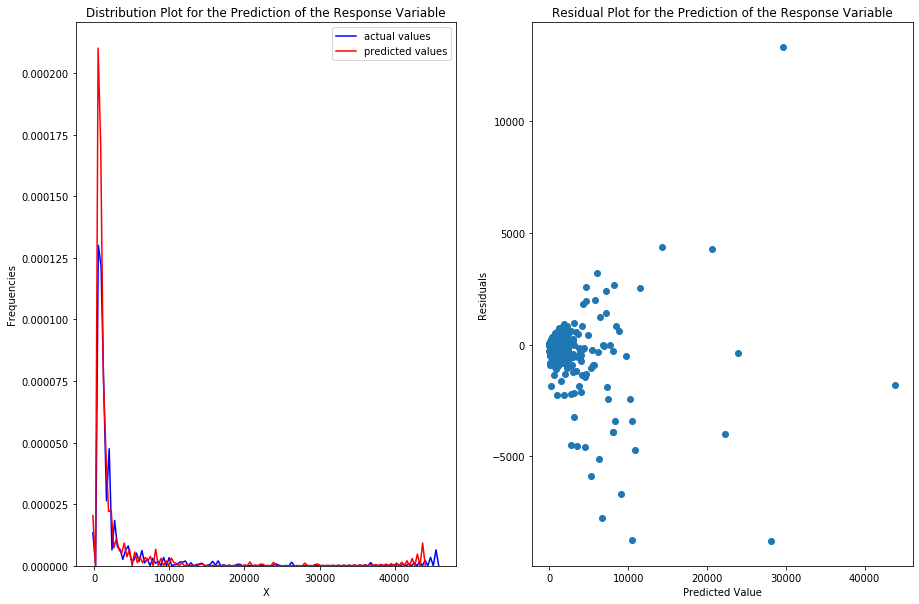

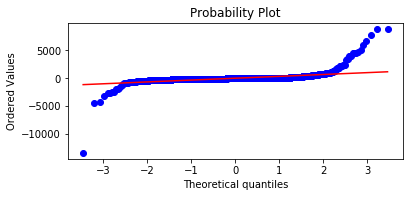

In [43]:
predictors = ["murder_and_nonnegligent_manslaughter_2015","violent_crime_2015","motor_vehicle_theft_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/18000)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [44]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'motor_vehicle_theft_2015'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2017                                    0
murder_and_nonnegligent_manslaughter_2017       0
violent_crime_2017                              0
burglary_2017                                   0
property_crime_2017                             0
larceny_theft_2017                              0
larceny_theft_2016                             48
robbery_2016                                   48
aggravated_assault_2016                        48
violent_crime_2016                             48
motor_vehicle_theft_2016                       48
murder_and_nonnegligent_manslaughter_2016      48
burglary_2016                                  51
property_crime_2016                           199
violent_crime_2015                            211
robbery_2015                                  211
aggravated_assault_2015                       211
murder_and_nonnegligent_manslaughter_2015     211
larceny_theft_2015                            212
burglary_2015             

Optimization terminated successfully.
         Current function value: 3.674263
         Iterations: 56
         Function evaluations: 61
         Gradient evaluations: 61
                       GeneralizedPoisson Regression Results                        
Dep. Variable:     motor_vehicle_theft_2015   No. Observations:                 2560
Model:                   GeneralizedPoisson   Df Residuals:                     2553
Method:                                 MLE   Df Model:                            6
Date:                      Fri, 29 May 2020   Pseudo R-squ.:                  0.1148
Time:                              19:18:15   Log-Likelihood:                -9406.1
converged:                             True   LL-Null:                       -10626.
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

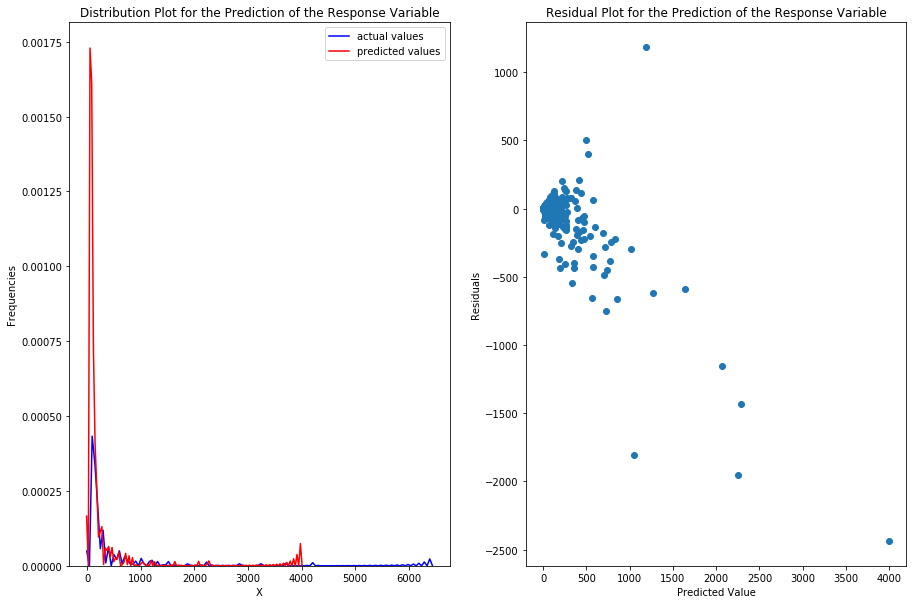

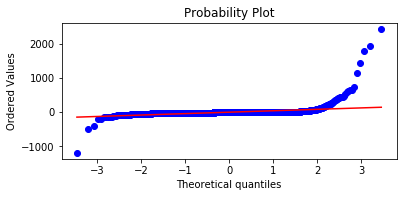

In [45]:
predictors = ["property_crime_2017","violent_crime_2017","larceny_theft_2017"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [46]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'murder_and_nonnegligent_manslaughter_2015'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2017                                    0
murder_and_nonnegligent_manslaughter_2017       0
violent_crime_2017                              0
burglary_2017                                   0
property_crime_2017                             0
larceny_theft_2017                              0
motor_vehicle_theft_2015                        0
larceny_theft_2016                             48
robbery_2016                                   48
aggravated_assault_2016                        48
violent_crime_2016                             48
motor_vehicle_theft_2016                       48
murder_and_nonnegligent_manslaughter_2016      48
burglary_2016                                  51
property_crime_2016                           199
robbery_2015                                  211
aggravated_assault_2015                       211
violent_crime_2015                            211
murder_and_nonnegligent_manslaughter_2015     211
larceny_theft_2015        

         Current function value: nan
         Iterations: 1
         Function evaluations: 18
         Gradient evaluations: 18


/home/sbr0/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1396: RuntimeWarning: invalid value encountered in log
  np.log(a1) - gammaln(endog + 1) - a2 / a1)
/home/sbr0/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sbr0/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1396: RuntimeWarning: invalid value encountered in log
  np.log(a1) - gammaln(endog + 1) - a2 / a1)


                                GeneralizedPoisson Regression Results                                
Dep. Variable:     murder_and_nonnegligent_manslaughter_2015   No. Observations:                 2561
Model:                                    GeneralizedPoisson   Df Residuals:                     2558
Method:                                                  MLE   Df Model:                            2
Date:                                       Fri, 29 May 2020   Pseudo R-squ.:                     nan
Time:                                               19:18:16   Log-Likelihood:                    nan
converged:                                             False   LL-Null:                       -3161.1
Covariance Type:                                   nonrobust   LLR p-value:                       nan
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Inte

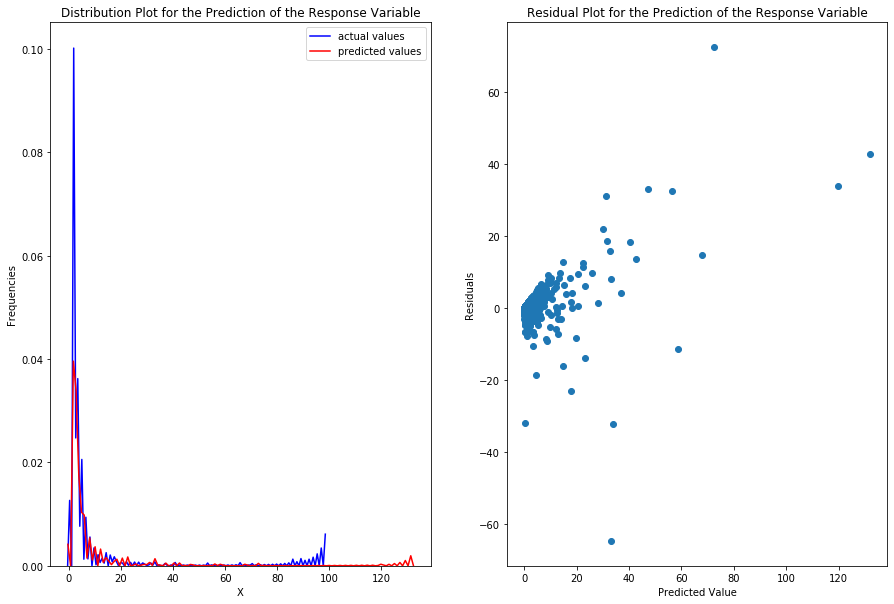

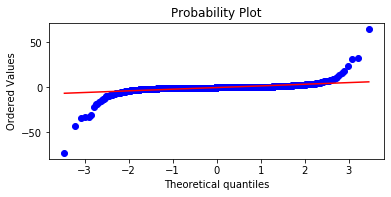

In [47]:
predictors = ["larceny_theft_2017"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [48]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'burglary_2015'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
murder_and_nonnegligent_manslaughter_2015       0
violent_crime_2017                              0
robbery_2017                                    0
murder_and_nonnegligent_manslaughter_2017       0
motor_vehicle_theft_2015                        0
burglary_2017                                   0
larceny_theft_2017                              0
property_crime_2017                             0
violent_crime_2016                             48
murder_and_nonnegligent_manslaughter_2016      48
motor_vehicle_theft_2016                       48
larceny_theft_2016                             48
aggravated_assault_2016                        48
robbery_2016                                   48
burglary_2016                                  51
property_crime_2016                           199
violent_crime_2015                            211
aggravated_assault_2015                       211
robbery_2015                                  211
burglary_2015             

Optimization terminated successfully.
         Current function value: 4.536700
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
                    GeneralizedPoisson Regression Results                     
Dep. Variable:          burglary_2015   No. Observations:                 2560
Model:             GeneralizedPoisson   Df Residuals:                     2555
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1980
Time:                        19:18:17   Log-Likelihood:                -11614.
converged:                       True   LL-Null:                       -14482.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Inte

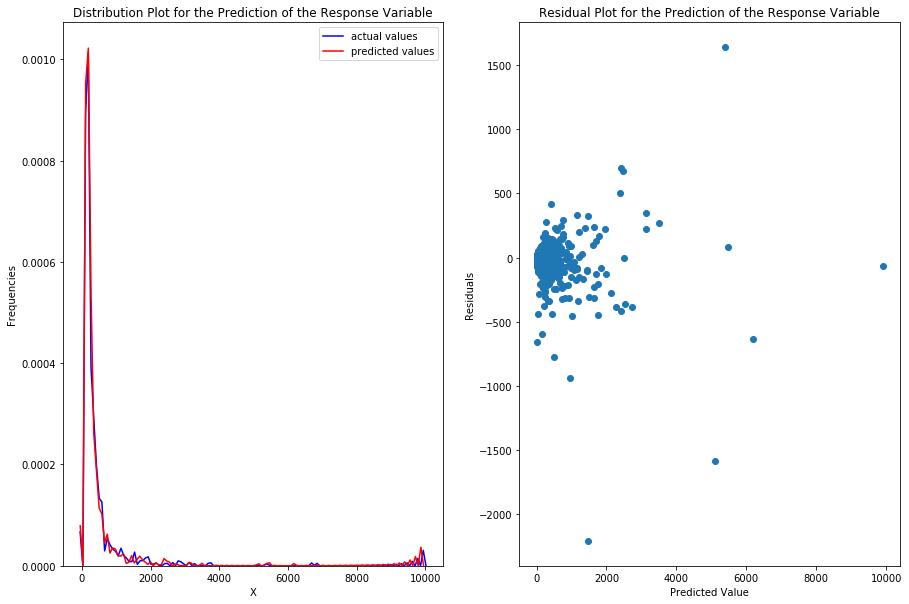

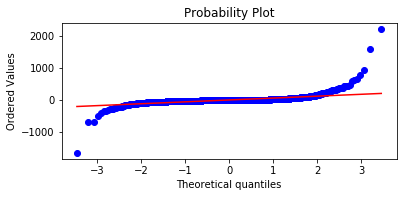

In [49]:
predictors = ["motor_vehicle_theft_2015",
              "burglary_2017"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [50]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'larceny_theft_2015'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
murder_and_nonnegligent_manslaughter_2015       0
violent_crime_2017                              0
robbery_2017                                    0
murder_and_nonnegligent_manslaughter_2017       0
burglary_2015                                   0
burglary_2017                                   0
motor_vehicle_theft_2015                        0
property_crime_2017                             0
larceny_theft_2017                              0
violent_crime_2016                             48
murder_and_nonnegligent_manslaughter_2016      48
motor_vehicle_theft_2016                       48
larceny_theft_2016                             48
aggravated_assault_2016                        48
robbery_2016                                   48
burglary_2016                                  51
property_crime_2016                           199
violent_crime_2015                            211
aggravated_assault_2015                       211
robbery_2015              

Optimization terminated successfully.
         Current function value: 5.057908
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29
                    GeneralizedPoisson Regression Results                     
Dep. Variable:     larceny_theft_2015   No. Observations:                 2560
Model:             GeneralizedPoisson   Df Residuals:                     2555
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.2108
Time:                        19:18:18   Log-Likelihood:                -12948.
converged:                       True   LL-Null:                       -16407.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept       

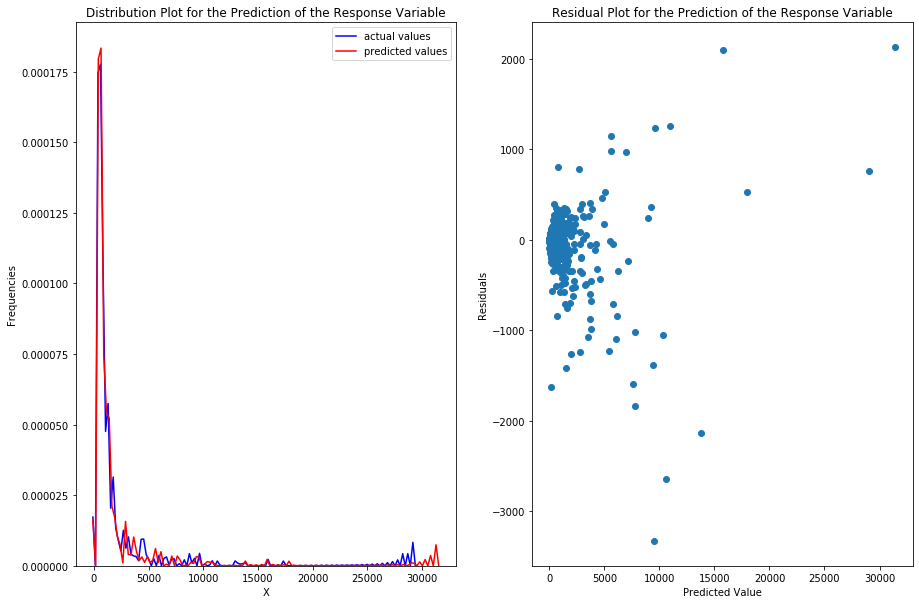

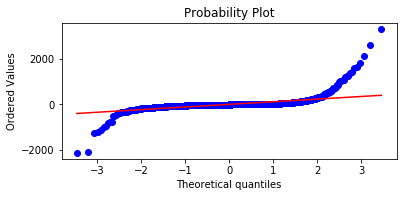

In [51]:
predictors = ["larceny_theft_2017","burglary_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [52]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'robbery_2015'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
murder_and_nonnegligent_manslaughter_2015       0
violent_crime_2017                              0
robbery_2017                                    0
murder_and_nonnegligent_manslaughter_2017       0
burglary_2015                                   0
burglary_2017                                   0
larceny_theft_2015                              0
property_crime_2017                             0
larceny_theft_2017                              0
motor_vehicle_theft_2015                        0
violent_crime_2016                             48
murder_and_nonnegligent_manslaughter_2016      48
motor_vehicle_theft_2016                       48
larceny_theft_2016                             48
aggravated_assault_2016                        48
robbery_2016                                   48
burglary_2016                                  51
property_crime_2016                           199
violent_crime_2015                            211
aggravated_assault_2015   

Optimization terminated successfully.
         Current function value: 1.898031
         Iterations: 57
         Function evaluations: 67
         Gradient evaluations: 67
                    GeneralizedPoisson Regression Results                     
Dep. Variable:           robbery_2015   No. Observations:                 2561
Model:             GeneralizedPoisson   Df Residuals:                     2556
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1922
Time:                        19:18:19   Log-Likelihood:                -4860.9
converged:                       True   LL-Null:                       -6017.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Inte

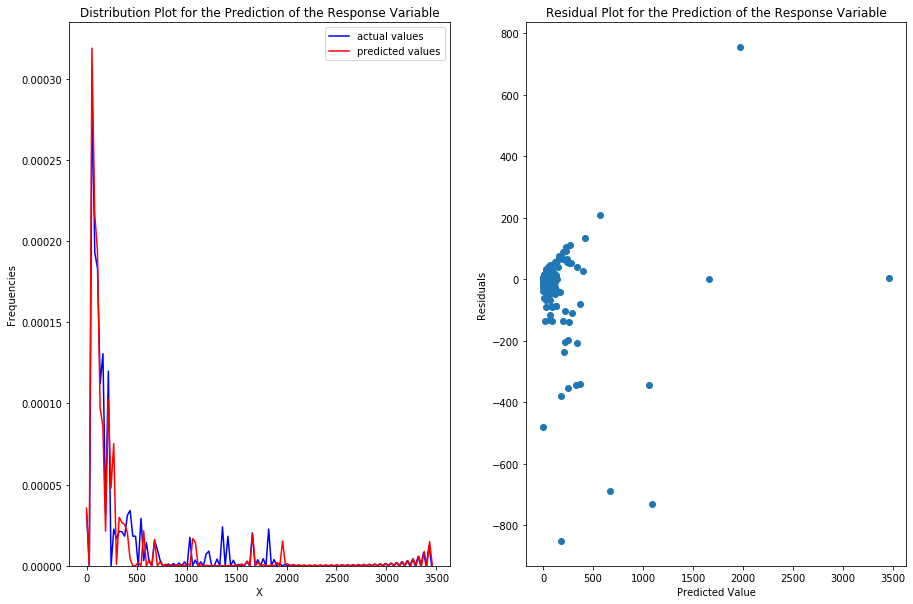

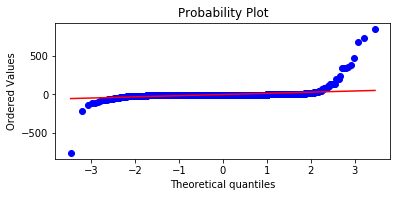

In [53]:
predictors = ["violent_crime_2017","motor_vehicle_theft_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [54]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'violent_crime_2015'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
violent_crime_2017                              0
motor_vehicle_theft_2015                        0
larceny_theft_2017                              0
property_crime_2017                             0
larceny_theft_2015                              0
burglary_2017                                   0
murder_and_nonnegligent_manslaughter_2015       0
burglary_2015                                   0
murder_and_nonnegligent_manslaughter_2017       0
robbery_2017                                    0
aggravated_assault_2016                        48
motor_vehicle_theft_2016                       48
murder_and_nonnegligent_manslaughter_2016      48
violent_crime_2016                             48
robbery_2016                                   48
larceny_theft_2016                             48
burglary_2016                                  51
property_crime_2016                           199
aggravated_assault_2015   

Optimization terminated successfully.
         Current function value: 4.030742
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29
                    GeneralizedPoisson Regression Results                     
Dep. Variable:     violent_crime_2015   No. Observations:                 2561
Model:             GeneralizedPoisson   Df Residuals:                     2556
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1682
Time:                        19:18:19   Log-Likelihood:                -10323.
converged:                       True   LL-Null:                       -12410.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Inte

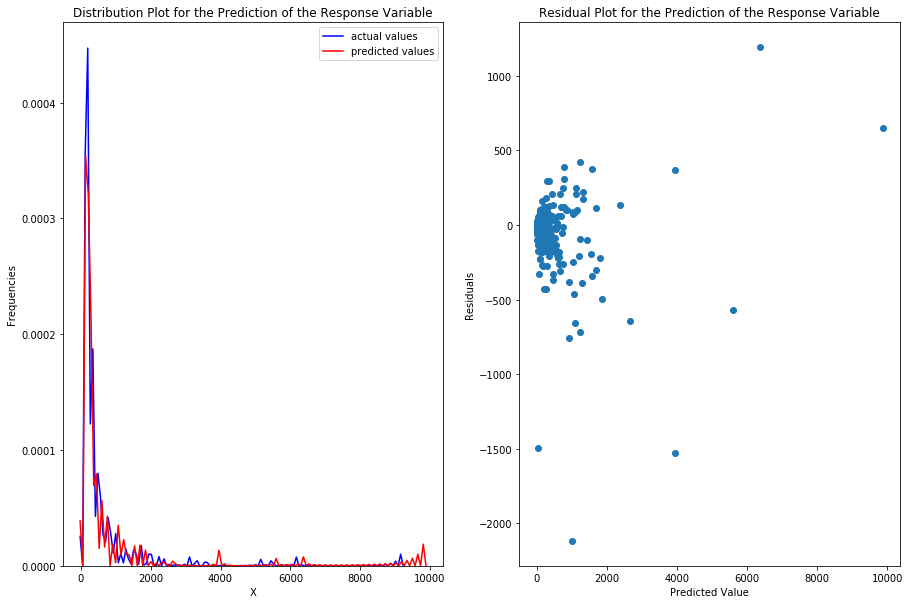

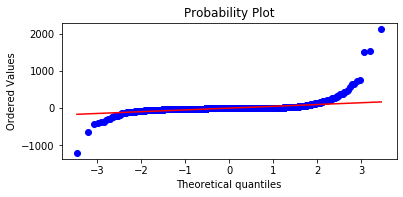

In [55]:
predictors = ["violent_crime_2017","motor_vehicle_theft_2015",]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [56]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'aggravated_assault_2015'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2015                        0
larceny_theft_2017                              0
property_crime_2017                             0
larceny_theft_2015                              0
burglary_2017                                   0
murder_and_nonnegligent_manslaughter_2015       0
burglary_2015                                   0
murder_and_nonnegligent_manslaughter_2017       0
robbery_2017                                    0
aggravated_assault_2016                        48
motor_vehicle_theft_2016                       48
murder_and_nonnegligent_manslaughter_2016      48
violent_crime_2016                             48
robbery_2016                                   48
larceny_theft_2016                             48
burglary_2016                                  51
property_crime_2016       

Optimization terminated successfully.
         Current function value: 2.990897
         Iterations: 22
         Function evaluations: 29
         Gradient evaluations: 29
                       GeneralizedPoisson Regression Results                       
Dep. Variable:     aggravated_assault_2015   No. Observations:                 2561
Model:                  GeneralizedPoisson   Df Residuals:                     2556
Method:                                MLE   Df Model:                            4
Date:                     Fri, 29 May 2020   Pseudo R-squ.:                  0.3400
Time:                             19:18:20   Log-Likelihood:                -7659.7
converged:                            True   LL-Null:                       -11606.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

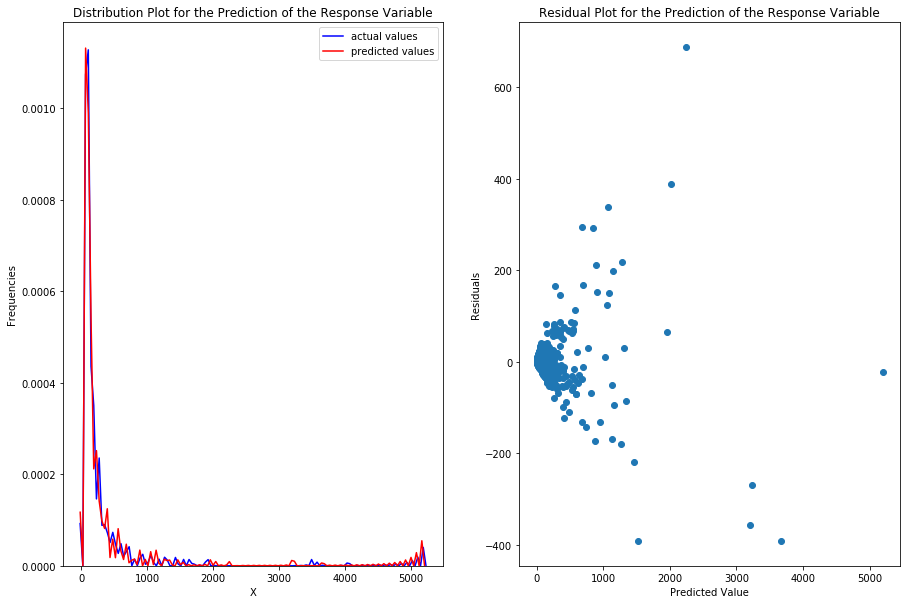

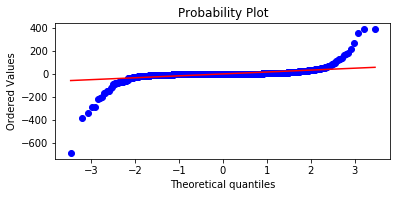

In [57]:
predictors = ["violent_crime_2017","violent_crime_2015",]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [58]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'property_crime_2015'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2015                        0
larceny_theft_2017                              0
property_crime_2017                             0
larceny_theft_2015                              0
burglary_2017                                   0
murder_and_nonnegligent_manslaughter_2015       0
burglary_2015                                   0
murder_and_nonnegligent_manslaughter_2017       0
aggravated_assault_2015                         0
robbery_2017                                    0
aggravated_assault_2016                        48
motor_vehicle_theft_2016                       48
murder_and_nonnegligent_manslaughter_2016      48
violent_crime_2016                             48
robbery_2016                                   48
larceny_theft_2016                             48
burglary_2016             

Optimization terminated successfully.
         Current function value: 5.562099
         Iterations: 32
         Function evaluations: 35
         Gradient evaluations: 35
                     GeneralizedPoisson Regression Results                     
Dep. Variable:     property_crime_2015   No. Observations:                 2560
Model:              GeneralizedPoisson   Df Residuals:                     2553
Method:                            MLE   Df Model:                            6
Date:                 Fri, 29 May 2020   Pseudo R-squ.:                  0.1978
Time:                         19:18:21   Log-Likelihood:                -14239.
converged:                        True   LL-Null:                       -17750.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Interc

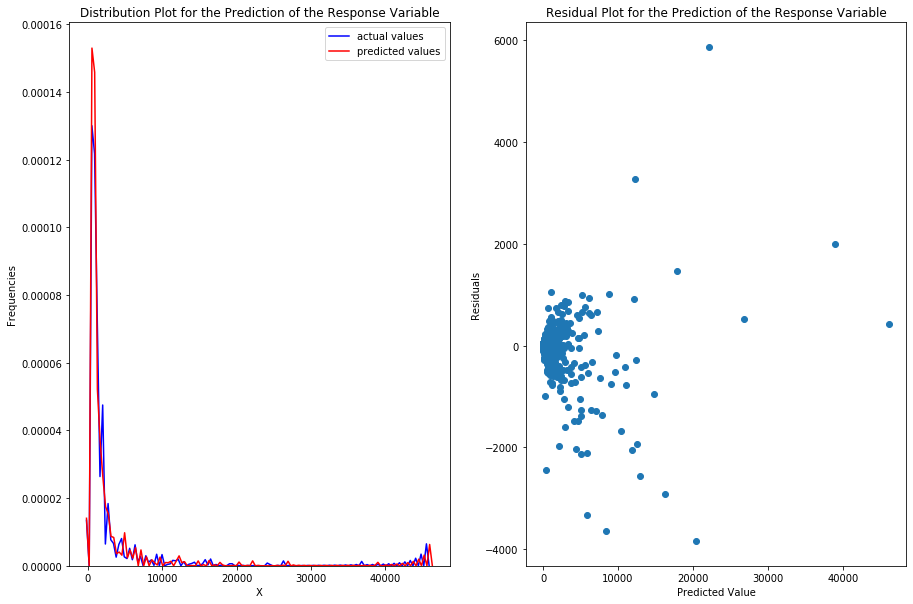

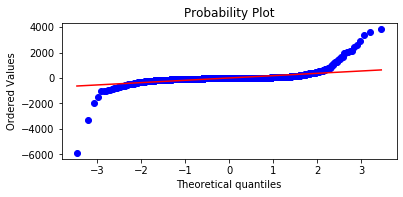

In [59]:
predictors = ["burglary_2017","violent_crime_2015","property_crime_2017"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [60]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'motor_vehicle_theft_2017'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2015                        0
larceny_theft_2017                              0
property_crime_2017                             0
larceny_theft_2015                              0
murder_and_nonnegligent_manslaughter_2015       0
burglary_2015                                   0
murder_and_nonnegligent_manslaughter_2017       0
aggravated_assault_2015                         0
robbery_2017                                    0
burglary_2017                                   0
aggravated_assault_2016                        48
motor_vehicle_theft_2016                       48
murder_and_nonnegligent_manslaughter_2016      48
violent_crime_2016                             48
robbery_2016                                   48
larceny_theft_2016        

Optimization terminated successfully.
         Current function value: 3.544753
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
                       GeneralizedPoisson Regression Results                        
Dep. Variable:     motor_vehicle_theft_2017   No. Observations:                 2445
Model:                   GeneralizedPoisson   Df Residuals:                     2442
Method:                                 MLE   Df Model:                            2
Date:                      Fri, 29 May 2020   Pseudo R-squ.:                  0.1880
Time:                              19:18:22   Log-Likelihood:                -8666.9
converged:                             True   LL-Null:                       -10673.
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

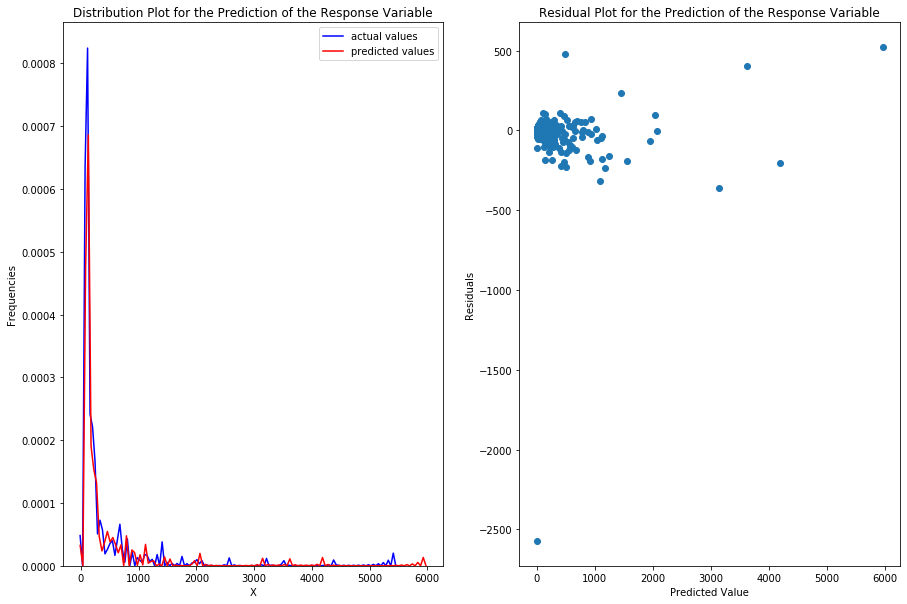

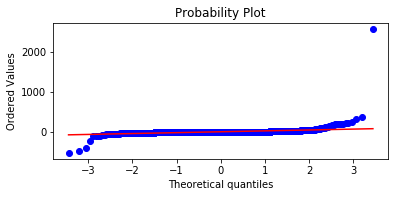

In [61]:
predictors = ["motor_vehicle_theft_2016"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [62]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'property_crime_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2015                        0
larceny_theft_2017                              0
motor_vehicle_theft_2017                        0
burglary_2017                                   0
burglary_2015                                   0
larceny_theft_2015                              0
aggravated_assault_2015                         0
robbery_2017                                    0
larceny_theft_2016                             48
motor_vehicle_theft_2016                       48
robbery_2016                                   48
violent_crime_2016                             48
murder_and_nonnegligent_ma

Optimization terminated successfully.
         Current function value: 5.941469
         Iterations: 38
         Function evaluations: 41
         Gradient evaluations: 41
                     GeneralizedPoisson Regression Results                     
Dep. Variable:     property_crime_2016   No. Observations:                 2573
Model:              GeneralizedPoisson   Df Residuals:                     2568
Method:                            MLE   Df Model:                            4
Date:                 Fri, 29 May 2020   Pseudo R-squ.:                  0.1413
Time:                         19:18:23   Log-Likelihood:                -15287.
converged:                        True   LL-Null:                       -17803.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercep

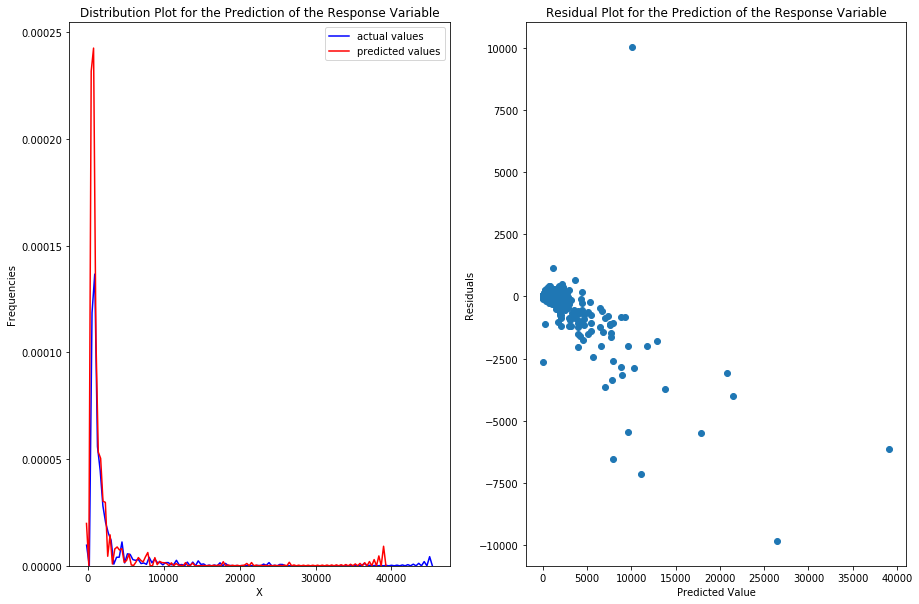

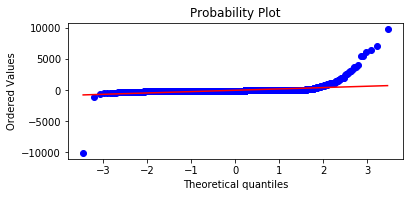

In [63]:
predictors = ["burglary_2017","larceny_theft_2017"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [64]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'aggravated_assault_2017'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2015                        0
larceny_theft_2017                              0
motor_vehicle_theft_2017                        0
larceny_theft_2015                              0
burglary_2017                                   0
robbery_2017                                    0
aggravated_assault_2015                         0
burglary_2015                                   0
robbery_2016                                   48
murder_and_nonnegligent_manslaughter_2016      48
larceny_theft_2016                             48
aggravated_assault_2016   

Optimization terminated successfully.
         Current function value: 3.778590
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
                       GeneralizedPoisson Regression Results                       
Dep. Variable:     aggravated_assault_2017   No. Observations:                 2444
Model:                  GeneralizedPoisson   Df Residuals:                     2441
Method:                                MLE   Df Model:                            2
Date:                     Fri, 29 May 2020   Pseudo R-squ.:                  0.1891
Time:                             19:18:24   Log-Likelihood:                -9234.9
converged:                            True   LL-Null:                       -11388.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

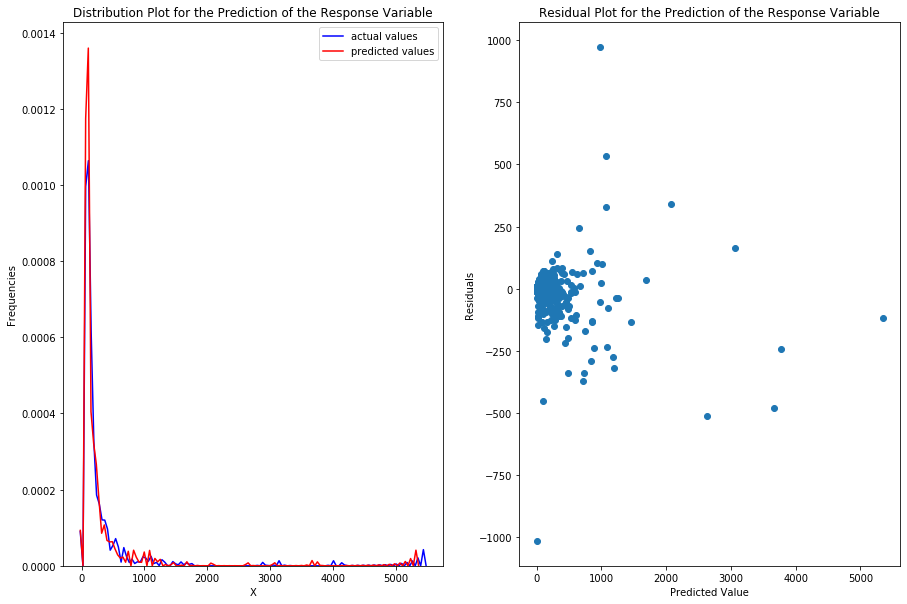

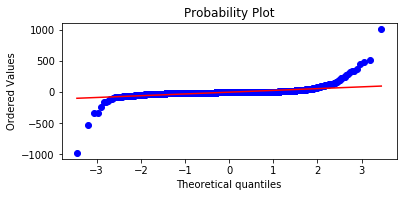

In [65]:
predictors = ["violent_crime_2016"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [66]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'rape_2017'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2015                        0
larceny_theft_2017                              0
motor_vehicle_theft_2017                        0
larceny_theft_2015                              0
burglary_2017                                   0
robbery_2017                                    0
aggravated_assault_2015                         0
burglary_2015                                   0
aggravated_assault_2017                         0
robbery_2016                                   48
murder_and_nonnegligent_manslaughter_2016      48
aggravated_assault_2016   

Optimization terminated successfully.
         Current function value: 2.594946
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
                    GeneralizedPoisson Regression Results                     
Dep. Variable:              rape_2017   No. Observations:                 2415
Model:             GeneralizedPoisson   Df Residuals:                     2412
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1513
Time:                        19:18:24   Log-Likelihood:                -6266.8
converged:                       True   LL-Null:                       -7384.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept       

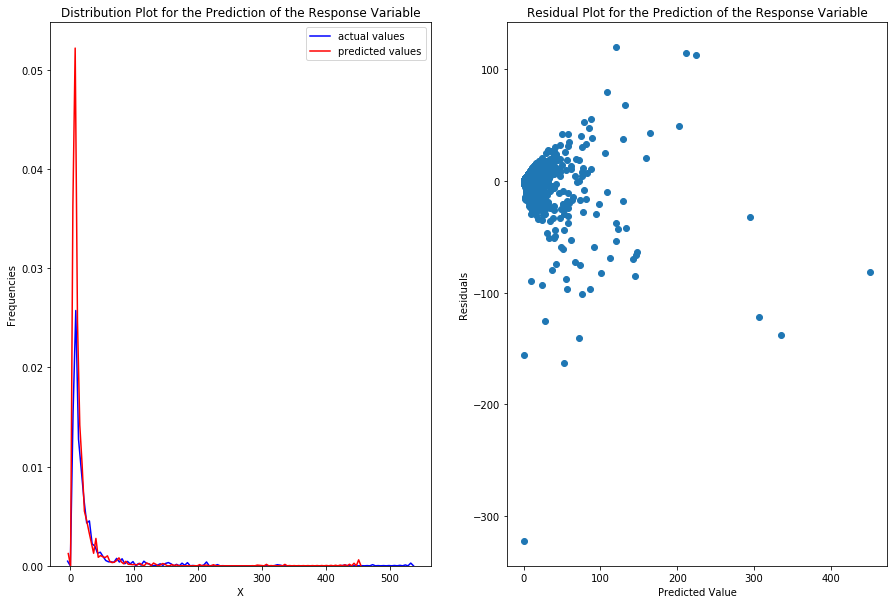

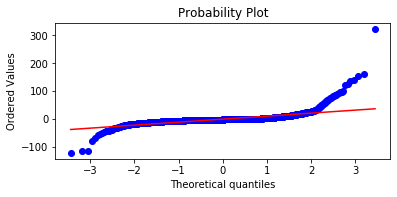

In [67]:
predictors = ["violent_crime_2015",]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [68]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'rape_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2015                        0
larceny_theft_2017                              0
motor_vehicle_theft_2017                        0
larceny_theft_2015                              0
robbery_2017                                    0
aggravated_assault_2015                         0
aggravated_assault_2017                         0
burglary_2015                                   0
rape_2017                                       0
burglary_2017                                   0
larceny_theft_2016                             48
motor_vehicle_theft_2016  

Optimization terminated successfully.
         Current function value: 2.545371
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
                    GeneralizedPoisson Regression Results                     
Dep. Variable:              rape_2016   No. Observations:                 2271
Model:             GeneralizedPoisson   Df Residuals:                     2268
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1496
Time:                        19:18:25   Log-Likelihood:                -5780.5
converged:                       True   LL-Null:                       -6797.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept     

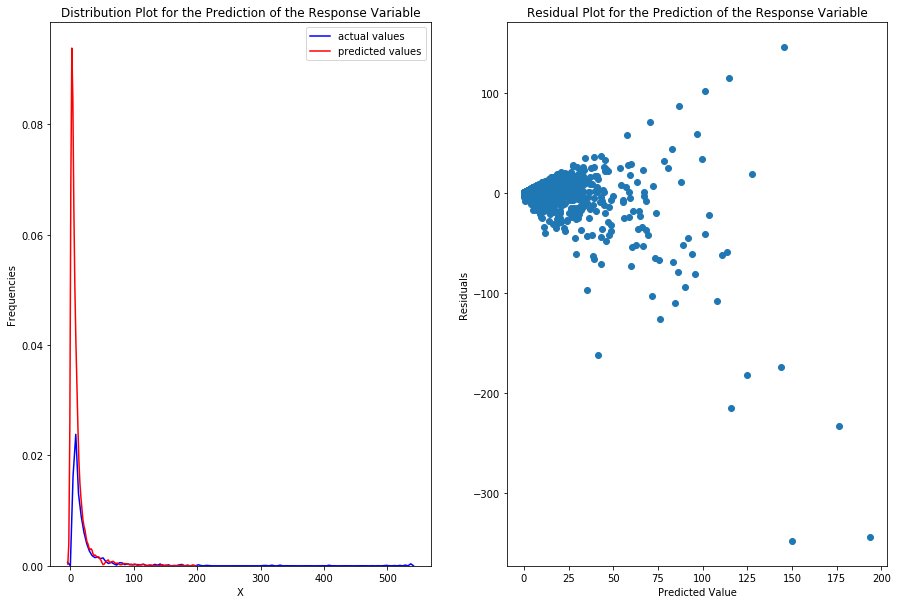

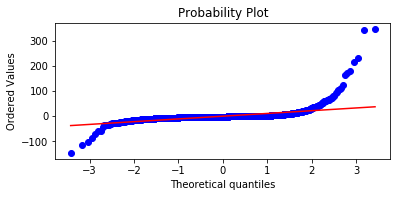

In [69]:
predictors = ["property_crime_2016"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [70]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'rape_2015'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
rape_2016                                       0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2015                        0
larceny_theft_2017                              0
motor_vehicle_theft_2017                        0
larceny_theft_2015                              0
robbery_2017                                    0
aggravated_assault_2015                         0
aggravated_assault_2017                         0
burglary_2015                                   0
rape_2017                                       0
burglary_2017                                   0
violent_crime_2016        

Optimization terminated successfully.
         Current function value: 2.313740
         Iterations: 31
         Function evaluations: 35
         Gradient evaluations: 35
                    GeneralizedPoisson Regression Results                     
Dep. Variable:              rape_2015   No. Observations:                 2176
Model:             GeneralizedPoisson   Df Residuals:                     2169
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.2169
Time:                        19:18:26   Log-Likelihood:                -5034.7
converged:                       True   LL-Null:                       -6429.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept     

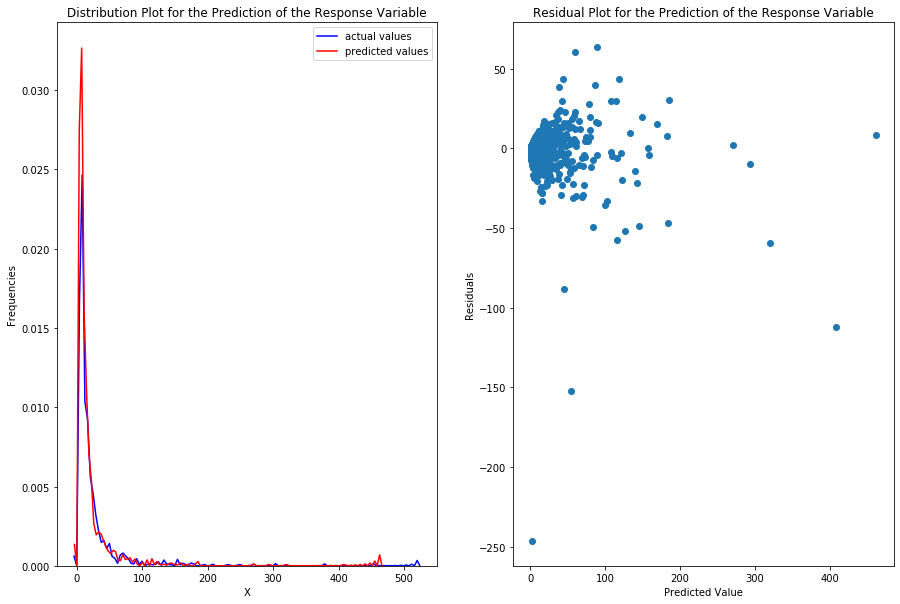

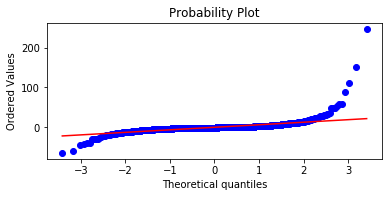

In [71]:
predictors = ["property_crime_2016","robbery_2015","rape_2016"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [72]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'burglary_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
rape_2016                                       0
rape_2015                                       0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2015                        0
motor_vehicle_theft_2017                        0
aggravated_assault_2017                         0
robbery_2017                                    0
aggravated_assault_2015                         0
larceny_theft_2017                              0
burglary_2015                                   0
rape_2017                                       0
larceny_theft_2015                              0
burglary_2017             

Optimization terminated successfully.
         Current function value: 4.561907
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28
                    GeneralizedPoisson Regression Results                     
Dep. Variable:          burglary_2016   No. Observations:                 2721
Model:             GeneralizedPoisson   Df Residuals:                     2716
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1887
Time:                        19:18:27   Log-Likelihood:                -12413.
converged:                       True   LL-Null:                       -15299.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept       

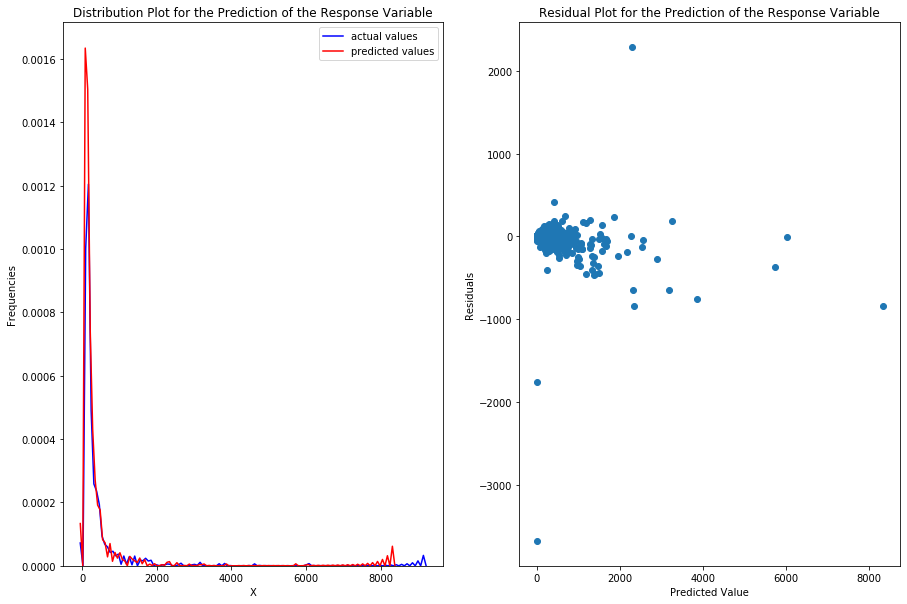

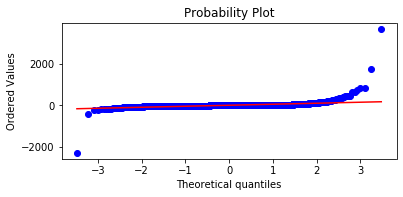

In [73]:
predictors = ["larceny_theft_2017","burglary_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [74]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'motor_vehicle_theft_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
rape_2016                                       0
rape_2015                                       0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2015                        0
motor_vehicle_theft_2017                        0
aggravated_assault_2017                         0
robbery_2017                                    0
aggravated_assault_2015                         0
larceny_theft_2017                              0
burglary_2015                                   0
burglary_2016                                   0
rape_2017                                       0
larceny_theft_2015        

Optimization terminated successfully.
         Current function value: 3.785427
         Iterations: 30
         Function evaluations: 33
         Gradient evaluations: 33
                       GeneralizedPoisson Regression Results                        
Dep. Variable:     motor_vehicle_theft_2016   No. Observations:                 2724
Model:                   GeneralizedPoisson   Df Residuals:                     2719
Method:                                 MLE   Df Model:                            4
Date:                      Fri, 29 May 2020   Pseudo R-squ.:                  0.1162
Time:                              19:18:28   Log-Likelihood:                -10312.
converged:                             True   LL-Null:                       -11668.
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

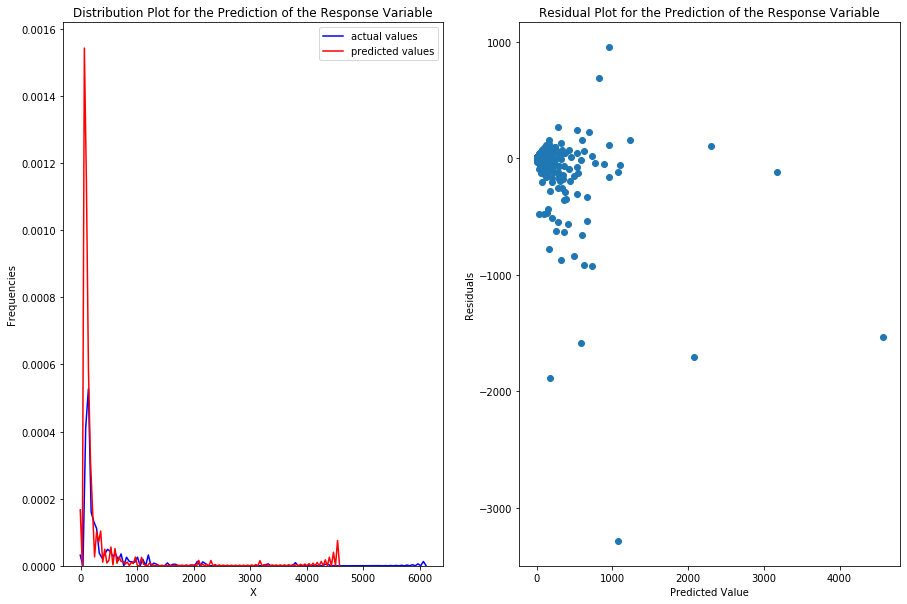

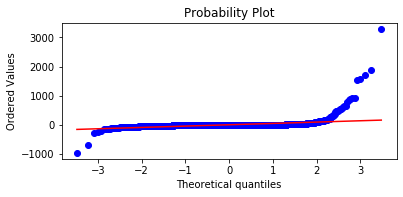

In [75]:
predictors = ["larceny_theft_2017","burglary_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [76]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'murder_and_nonnegligent_manslaughter_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
rape_2016                                       0
rape_2015                                       0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2016                        0
motor_vehicle_theft_2015                        0
motor_vehicle_theft_2017                        0
larceny_theft_2015                              0
burglary_2017                                   0
burglary_2016                                   0
burglary_2015                                   0
aggravated_assault_2017                         0
aggravated_assault_2015                         0
robbery_2017              

Optimization terminated successfully.
         Current function value: 1.090647
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
                                GeneralizedPoisson Regression Results                                
Dep. Variable:     murder_and_nonnegligent_manslaughter_2016   No. Observations:                 2724
Model:                                    GeneralizedPoisson   Df Residuals:                     2721
Method:                                                  MLE   Df Model:                            2
Date:                                       Fri, 29 May 2020   Pseudo R-squ.:                  0.1529
Time:                                               19:18:28   Log-Likelihood:                -2970.9
converged:                                              True   LL-Null:                       -3507.3
Covariance Type:                                   nonrobust   LLR p-value:                1.125e-233
            

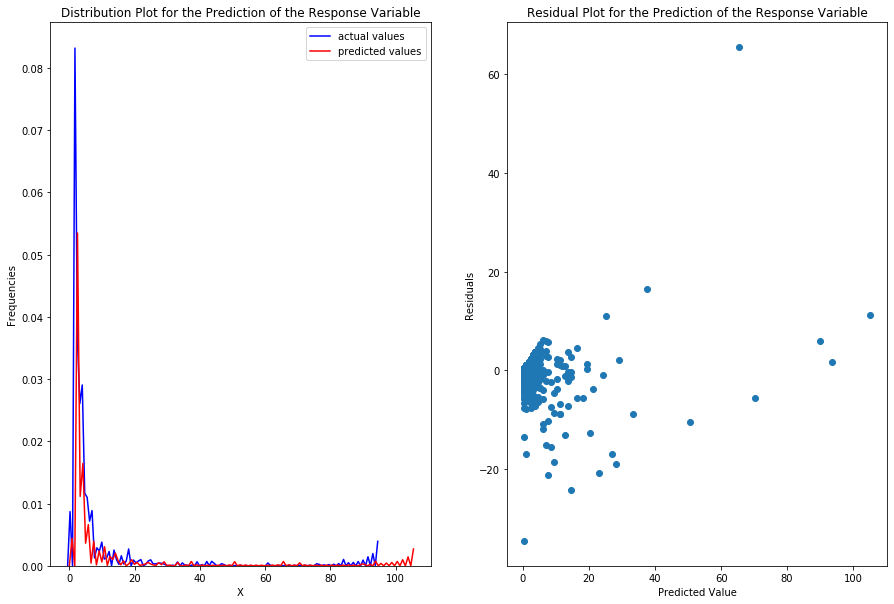

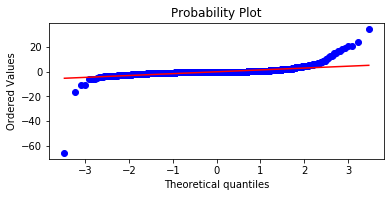

In [77]:
predictors = ["murder_and_nonnegligent_manslaughter_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [78]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'violent_crime_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
rape_2016                                       0
rape_2015                                       0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2016       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2015                              0
motor_vehicle_theft_2016                        0
motor_vehicle_theft_2017                        0
larceny_theft_2017                              0
larceny_theft_2015                              0
burglary_2017                                   0
burglary_2016                                   0
burglary_2015                                   0
aggravated_assault_2017                         0
aggravated_assault_2015   

Optimization terminated successfully.
         Current function value: 4.139722
         Iterations: 26
         Function evaluations: 30
         Gradient evaluations: 30
                    GeneralizedPoisson Regression Results                     
Dep. Variable:     violent_crime_2016   No. Observations:                 2724
Model:             GeneralizedPoisson   Df Residuals:                     2719
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1575
Time:                        19:18:29   Log-Likelihood:                -11277.
converged:                       True   LL-Null:                       -13385.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept     

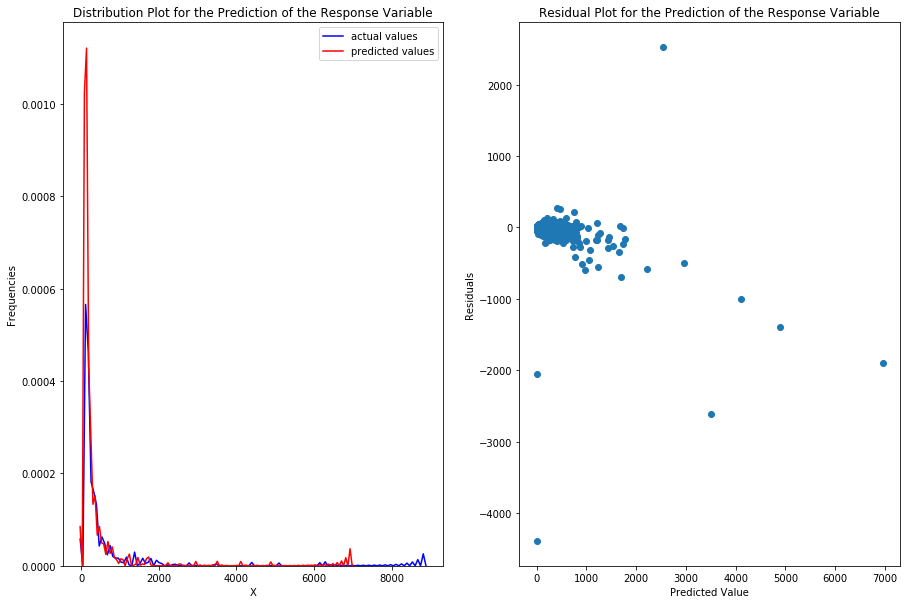

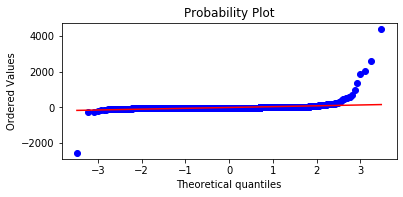

In [79]:
predictors = ["violent_crime_2015","property_crime_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [80]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'larceny_theft_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
rape_2016                                       0
rape_2015                                       0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2016       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2016                              0
violent_crime_2015                              0
motor_vehicle_theft_2016                        0
motor_vehicle_theft_2017                        0
larceny_theft_2017                              0
larceny_theft_2015                              0
burglary_2017                                   0
burglary_2016                                   0
burglary_2015                                   0
aggravated_assault_2017   

Optimization terminated successfully.
         Current function value: 5.409083
         Iterations: 25
         Function evaluations: 29
         Gradient evaluations: 29
                    GeneralizedPoisson Regression Results                     
Dep. Variable:     larceny_theft_2016   No. Observations:                 2724
Model:             GeneralizedPoisson   Df Residuals:                     2721
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1541
Time:                        19:18:30   Log-Likelihood:                -14734.
converged:                       True   LL-Null:                       -17418.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept       

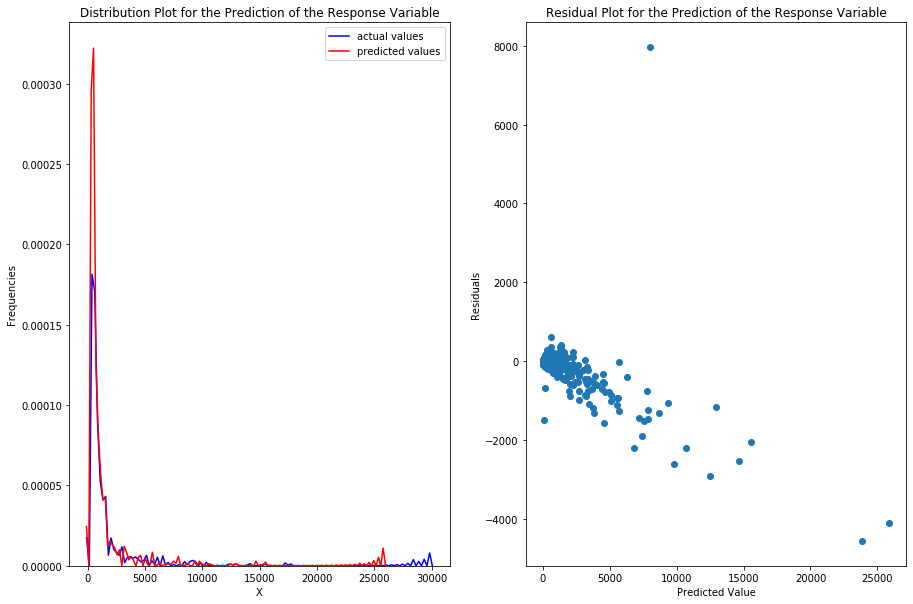

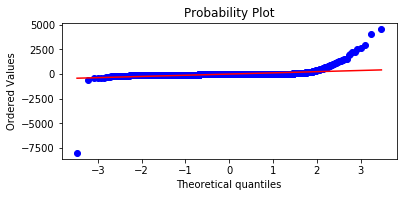

In [81]:
predictors = ["larceny_theft_2017"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [82]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'robbery_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
rape_2016                                       0
rape_2015                                       0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2016       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2016                              0
violent_crime_2015                              0
motor_vehicle_theft_2016                        0
motor_vehicle_theft_2017                        0
larceny_theft_2017                              0
larceny_theft_2016                              0
larceny_theft_2015                              0
burglary_2017                                   0
burglary_2016                                   0
burglary_2015             

Optimization terminated successfully.
         Current function value: 2.018997
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
                    GeneralizedPoisson Regression Results                     
Dep. Variable:           robbery_2016   No. Observations:                 2724
Model:             GeneralizedPoisson   Df Residuals:                     2721
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1635
Time:                        19:18:31   Log-Likelihood:                -5499.7
converged:                       True   LL-Null:                       -6574.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Inte

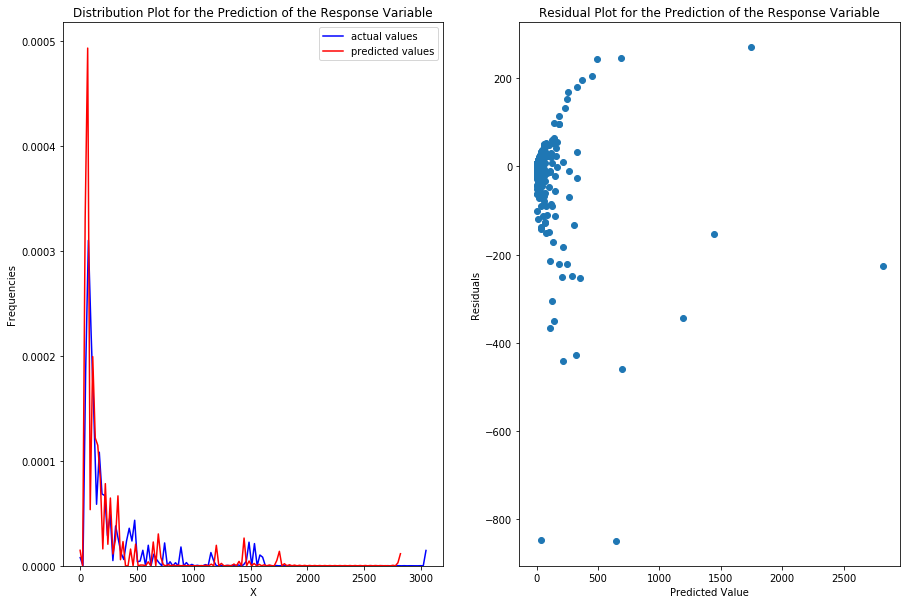

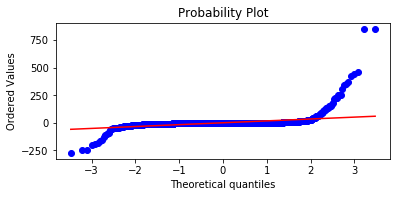

In [83]:
predictors = ["motor_vehicle_theft_2016"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [84]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'aggravated_assault_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
rape_2016                                       0
rape_2015                                       0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2016       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2016                              0
violent_crime_2015                              0
motor_vehicle_theft_2016                        0
motor_vehicle_theft_2017                        0
larceny_theft_2017                              0
larceny_theft_2016                              0
larceny_theft_2015                              0
burglary_2017                                   0
burglary_2016                                   0
burglary_2015             

Optimization terminated successfully.
         Current function value: 3.830078
         Iterations: 17
         Function evaluations: 20
         Gradient evaluations: 20
                       GeneralizedPoisson Regression Results                       
Dep. Variable:     aggravated_assault_2016   No. Observations:                 2724
Model:                  GeneralizedPoisson   Df Residuals:                     2721
Method:                                MLE   Df Model:                            2
Date:                     Fri, 29 May 2020   Pseudo R-squ.:                  0.1661
Time:                             19:18:32   Log-Likelihood:                -10433.
converged:                            True   LL-Null:                       -12512.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

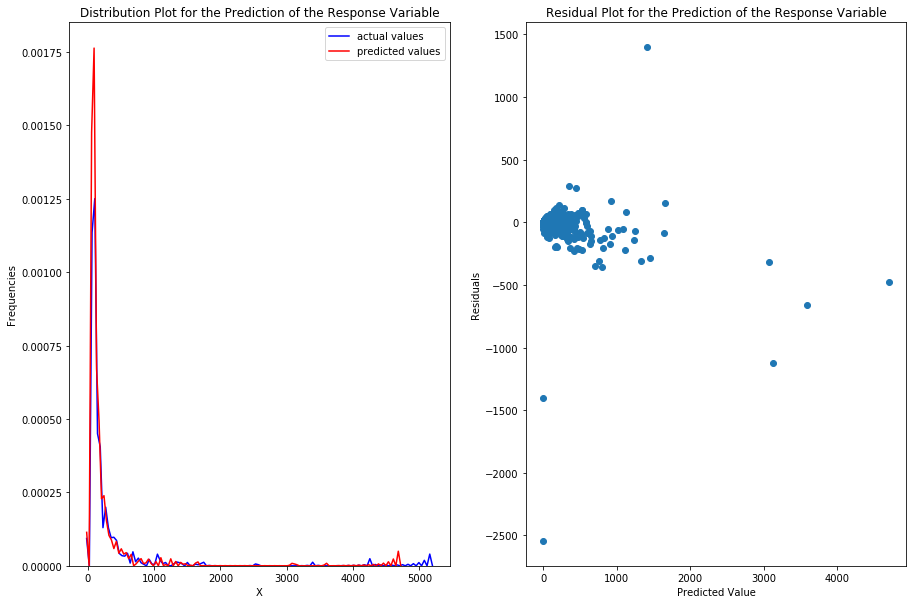

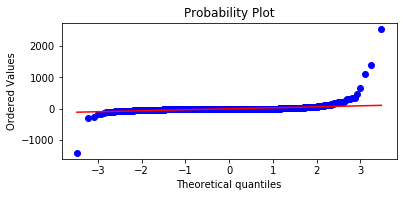

In [85]:
predictors = ["aggravated_assault_2015"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [86]:
print("Remaining Crime Values:")
print(county_df[crime_types].isnull().sum().sort_values())
response = 'motor_vehicle_theft_2016'
print("\n\nPotential Predictors for",response)
sorted_predictor_list,mn=possible_predictors(county_df,response,crime_types)

Remaining Crime Values:
robbery_2015                                    0
rape_2016                                       0
rape_2015                                       0
murder_and_nonnegligent_manslaughter_2017       0
murder_and_nonnegligent_manslaughter_2016       0
murder_and_nonnegligent_manslaughter_2015       0
property_crime_2017                             0
property_crime_2016                             0
property_crime_2015                             0
violent_crime_2017                              0
violent_crime_2016                              0
violent_crime_2015                              0
motor_vehicle_theft_2016                        0
motor_vehicle_theft_2017                        0
larceny_theft_2017                              0
larceny_theft_2016                              0
larceny_theft_2015                              0
burglary_2017                                   0
burglary_2016                                   0
burglary_2015             

Optimization terminated successfully.
         Current function value: 3.591558
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
                       GeneralizedPoisson Regression Results                        
Dep. Variable:     motor_vehicle_theft_2016   No. Observations:                 2772
Model:                   GeneralizedPoisson   Df Residuals:                     2769
Method:                                 MLE   Df Model:                            2
Date:                      Fri, 29 May 2020   Pseudo R-squ.:                  0.1618
Time:                              19:18:33   Log-Likelihood:                -9955.8
converged:                             True   LL-Null:                       -11878.
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

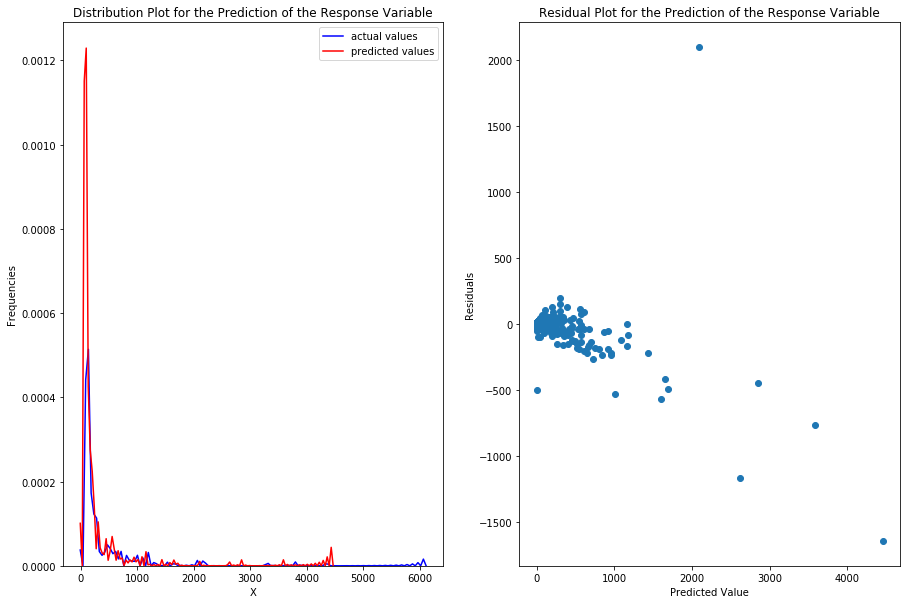

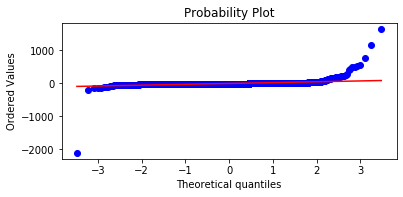

In [87]:
predictors = ["motor_vehicle_theft_2017"]
transformations={predictor:[lambda var:(var + 1).apply(np.log),
                            lambda var:np.power(var,1/5)]
                 for predictor in predictors}
model, model_df, model_predictors = prepare_poisson(county_df,predictors,
                                                   response,transformations)
county_df = poisson_predictions(model,model_df,df_to_modify=county_df,
                                 model_predictors=model_predictors,
                                 response = response)

In [88]:
# As "not all crimes are created equal", these weights are
# based on the Average Sellin-Wolfgang Seriousness Scores
# as discussed in the research of Blumstein (1974)
# property crimes were calculated via the average of those for
# burglary, larceny + theft, and motor vehicle theft.

crime_weights = {
 'murder_and_nonnegligent_manslaughter': 33.29,
 'rape': 15.33,
 'robbery': 6.43,
 'aggravated_assault': 9.74,
 'property_crime': 2.45,
 'burglary': 2.64,
 'larceny_theft': 2.26,
 'motor_vehicle_theft': 2.29,
 'violent_crime':9.74
}

In [89]:
# copy_df = county_df.copy(deep=True)
# county_df = copy_df.copy(deep=True)

In [90]:
# this is an estimate based on the data relating to only counties assessed in this analysis
def by_state(county_data,variable,function = np.sum):
    return county_data.groupby("state")[variable].transform(function)

def area_crime_severity(crime_data,crime_weights,year):
    crime_weights_by_year = {"{t}_{y}".format(t=crime_type,y=year):weight for crime_type, weight in crime_weights.items()}
    weighted_crime_frequency = pd.concat([crime_weights_by_year[crime_type]* crime_data[crime_type] for crime_type in crime_weights_by_year],axis=1)
    return weighted_crime_frequency

county_df["crime_severity_2015"] = area_crime_severity(county_df,crime_weights,2015).sum(axis=1)
county_df["crime_severity_2016"] = area_crime_severity(county_df,crime_weights,2016).sum(axis=1)
county_df["crime_severity_2017"] = area_crime_severity(county_df,crime_weights,2017).sum(axis=1)
county_df["crime_severity"] = county_df[["crime_severity_2015","crime_severity_2016","crime_severity_2017"]].mean(axis=1)

county_df["population_density_est_2015"] = county_df["popestimate2015"] / county_df["geographical_area_(sq_mi)"]
county_df["population_density_est_2016"] = county_df["popestimate2016"] / county_df["geographical_area_(sq_mi)"]
county_df["population_density_est_2017"] = county_df["popestimate2017"] / county_df["geographical_area_(sq_mi)"]
county_df["population_density_est"] = county_df[["population_density_est_2015","population_density_est_2016","population_density_est_2017"]].mean(axis=1)

county_df["crime_severity_by_pop_density"]  = county_df["crime_severity"] / county_df["population_density_est"]
                                                                                    
county_df["total_county_geographical_area_by_state_(sq_mi)"] = by_state(county_df,"geographical_area_(sq_mi)")
county_df["state_population_density_est_2015"] = by_state(county_df,"popestimate2015") / county_df["total_county_geographical_area_by_state_(sq_mi)"]
county_df["state_population_density_est_2016"] = by_state(county_df,"popestimate2016") / county_df["total_county_geographical_area_by_state_(sq_mi)"]
county_df["state_population_density_est_2017"] = by_state(county_df,"popestimate2017") / county_df["total_county_geographical_area_by_state_(sq_mi)"]
county_df["state_population_density_est"] = county_df[["state_population_density_est_2015",
                                                      "state_population_density_est_2016",
                                                      "state_population_density_est_2017"]].mean(axis=1)
county_df["state_crime_severity_2015"] = by_state(county_df,"crime_severity_2015")
county_df["state_crime_severity_2016"] = by_state(county_df,"crime_severity_2016")
county_df["state_crime_severity_2017"] = by_state(county_df,"crime_severity_2017")
county_df["state_crime_severity"] = county_df[["state_crime_severity_2015","state_crime_severity_2016","state_crime_severity_2017"]].mean(axis=1)
county_df["state_crime_severity_by_pop_density"] = county_df["state_crime_severity"] / county_df["state_population_density_est"]


employed_by_year = county_df.columns[county_df.columns.str.contains("^employed_201[567]")]
unemployed_by_year = county_df.columns[county_df.columns.str.contains("^unemployed_201[567]")]

county_df["avg_unemployement_rate"] = (county_df[unemployed_by_year] / (county_df[unemployed_by_year] + county_df[employed_by_year])).mean()
# county_df["avg_employement_rate"] = 1 - county_df["avg_unemployement_rate"]

income_by_year = county_df.columns[county_df.columns.str.contains("^income_201[567]")]
county_df["avg_income"] = county_df[income_by_year].mean(axis=1)


employed_by_year = county_df.columns[county_df.columns.str.contains("^employed_201[567]")]
unemployed_by_year = county_df.columns[county_df.columns.str.contains("^unemployed_201[567]")]
employment_rate_by_year = pd.DataFrame({year:county_df[year_emp] / (county_df[year_unemp]+county_df[year_emp]) 
                                          for (year,year_emp, year_unemp) in zip([2015,2016,2017],employed_by_year,unemployed_by_year)})


#county_df["state_crime_severity_by_pop_density"] = county_df["state_crime_severity"] / county_df["state_population_density_est"]
county_df["employment_pct"] = employment_rate_by_year.mean(axis=1)

In [91]:
display(county_df.head())
display(county_df.isnull().sum())

,state,raw_county_data_2015,violent_crime_2015,murder_and_nonnegligent_manslaughter_2015,rape_2015,rape_previous_def_2015,robbery_2015,aggravated_assault_2015,property_crime_2015,burglary_2015,larceny_theft_2015,motor_vehicle_theft_2015,arson_2015,state/county_type_2015,notice_num_1_2015,notice_num_2_2015,notice_1_2015,notice_2_2015,county,area,loc_abbrev_x,raw_county_data_2016,violent_crime_2016,murder_and_nonnegligent_manslaughter_2016,rape_2016,rape_previous_def_2016,robbery_2016,aggravated_assault_2016,property_crime_2016,burglary_2016,larceny_theft_2016,motor_vehicle_theft_2016,arson_2016,state/county_type_2016,notice_num_1_2016,notice_num_2_2016,notice_1_2016,notice_2_2016,loc_abbrev_y,raw_county_data_2017,violent_crime_2017,murder_and_nonnegligent_manslaughter_2017,rape_2017,robbery_2017,aggravated_assault_2017,property_crime_2017,burglary_2017,larceny_theft_2017,motor_vehicle_theft_2017,arson_2017,...,income_2015,income_2016,income_2017,employed_2007,unemployed_2007,employed_2008,unemployed_2008,employed_2009,unemployed_2009,employed_2010,unemployed_2010,employed_2011,unemployed_2011,employed_2012,unemployed_2012,employed_2013,unemployed_2013,employed_2014,unemployed_2014,employed_2015,unemployed_2015,employed_2016,unemployed_2016,employed_2017,unemployed_2017,geographical_area_(sq_mi),housing_density_(per_sq_mi),population,crime_severity_2015,crime_severity_2016,crime_severity_2017,crime_severity,population_density_est_2015,population_density_est_2016,population_density_est_2017,population_density_est,crime_severity_by_pop_density,total_county_geographical_area_by_state_(sq_mi),state_population_density_est_2015,state_population_density_est_2016,state_population_density_est_2017,state_population_density_est,state_crime_severity_2015,state_crime_severity_2016,state_crime_severity_2017,state_crime_severity,state_crime_severity_by_pop_density,avg_unemployement_rate,avg_income,employment_pct
0,Alabama,Autauga,69.0,0.0,13.0,NaN,6.0,50.0,344.0,111.0,187.0,46.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,Autauga,"Autauga, Alabama","A, Alabama",Autauga,73.0,1.0,12.0,NaN,8.0,52.0,429.0,146.0,233.0,50.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,"A, Alabama",Autauga,55.0,2.0,5.0,5.0,43.0,384.0,131.0,206.0,47.0,NaN,...,38591.0,39509.0,40484.0,23577.0,806.0,23420.0,1267.0,22301.0,2402.0,23431.0,2282.0,23677.0,2159.0,23961.0,1779.0,24205.0,1605.0,24107.0,1495.0,24272.0,1330.0,24593.0,1325.0,24908.0,1001.0,604.39,37.2,54571,3060.73,3563.76,2989.73,3204.740000,90.732805,91.460812,91.834742,91.342786,35.084763,49716.68,96.070775,96.273746,96.567792,96.304104,228662.78,247350.86,235419.72,237144.453333,2462.454276,NaN,39528.000000,0.952764
1,Alabama,Baldwin,115.0,0.0,9.0,NaN,33.0,73.0,648.0,225.0,390.0,33.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,Baldwin,"Baldwin, Alabama","B, Alabama",Baldwin,127.0,1.0,5.0,NaN,23.0,98.0,613.0,229.0,342.0,42.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,"B, Alabama",Baldwin,163.0,1.0,9.0,18.0,135.0,737.0,226.0,442.0,69.0,NaN,...,41412.0,43004.0,44079.0,80099.0,2560.0,79372.0,3851.0,74403.0,8048.0,75120.0,8339.0,77418.0,7627.0,78065.0,6349.0,79626.0,5654.0,81115.0,5300.0,82843.0,4862.0,85656.0,4844.0,87915.0,3652.0,2027.31,65.5,182265,5319.85,5424.84,6748.74,5831.143333,100.065111,102.356818,104.881838,102.434589,56.925531,49716.68,96.070775,96.273746,96.567792,96.304104,228662.78,247350.86,235419.72,237144.453333,2462.454276,NaN,42831.666667,0.950385
2,Alabama,Bibb,7.0,0.0,2.0,NaN,1.0,4.0,41.0,20.0,18.0,3.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,Bibb,"Bibb, Alabama","B, Alabama",Bibb,0.0,0.0,0.0,NaN,0.0,0.0,37.0,20.0,14.0,3.0,NaN,ALABAMA - Metropolitan Counties,NaN,NaN,NaN,NaN,"B, Alabama",Bibb,3.0,0.0,1.0,1.0,1.0,69.0,41.0,24.0,4.0,NaN,...,29048.0,28989.0,30022.0,8432.0,359.0,8241.0,508.0,7581.0,1161.0,7914.0,1020.0,7996.0,937.0,8047.0,751.0,8016.0,689.0,7945.0,617.0,8005.0,567.0,8050.0,557.0,8133.0,373.0,626.17,14.4,22915,345.03,181.96,401.41,309.4666

state                                                 0
raw_county_data_2015                                211
violent_crime_2015                                    0
murder_and_nonnegligent_manslaughter_2015             0
rape_2015                                             0
rape_previous_def_2015                             2347
robbery_2015                                          0
aggravated_assault_2015                               0
property_crime_2015                                   0
burglary_2015                                         0
larceny_theft_2015                                    0
motor_vehicle_theft_2015                              0
arson_2015                                          350
state/county_type_2015                              211
notice_num_1_2015                                  2739
notice_num_2_2015                                  2771
notice_1_2015                                      2739
notice_2_2015                                   

In [92]:
potential_factors = ["crime_severity","state_crime_severity","population_density_est",
           "state_population_density_est", "avg_income", "popestimate2017",
           "crime_severity_by_pop_density","state_crime_severity_by_pop_density",
           "employment_pct","avg_fmr_2017"]

county_numeric_df = county_df.select_dtypes(np.number)
factors_sum_missing = county_numeric_df[potential_factors].isnull().sum()
factors_w_missing = factors_sum_missing.index[factors_sum_missing.values > 0]
display(factors_sum_missing)

crime_severity                         0
state_crime_severity                   0
population_density_est                 0
state_population_density_est           0
avg_income                             0
popestimate2017                        0
crime_severity_by_pop_density          0
state_crime_severity_by_pop_density    0
employment_pct                         0
avg_fmr_2017                           0
dtype: int64

In [93]:
# imputer = IterativeImputer(BayesianRidge())
# imputation_matrix = imputer.fit_transform(county_numeric_df[potential_factors])
# imputations = pd.DataFrame(imputation_matrix, columns=potential_factors,
#              index=county_numeric_df.index).merge(county_df["area"],left_index=True,right_index=True)
# display(imputations.head())
# display(county_df[potential_factors].head())
# county_df[factors_w_missing] = imputations[factors_w_missing]
# county_df[potential_factors].isnull().sum()

In [94]:
# only two of the counties have data missing for population density estimates. Here, we impute the estimate
# for the population density of these areas for later calculation.

In [95]:
county_df=county_df.drop(["rape_previous_def_2015","rape_previous_def_2016"],axis=1)
county_df=county_df.drop(["population"],axis=1)
county_df.to_csv("/home/sbr0/Dropbox/Analysis Planning/coursera stuffs/Capstone/First-Class Restaurant Location Analysis/data sets/Imputed Counties Data Set.csv",index=False)